# Sleep and Dream Database (SDDb) Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                      'font.family': 'Helvetica'})
plt.rcParams['axes.facecolor'] = '#F8F8F8'


In [2]:
from textblob import TextBlob
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [3]:
apikey = 'aBk6uX_UYs9hbNN2R8j6LDsxmftZ9umqb_N8hKMiAXQ9'
url = 'https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/3dbc0cbf-93a7-4dbd-9e2c-cfa743e27a5c'

In [4]:
authenticator = IAMAuthenticator(apikey)
ta = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)

ta.set_service_url(url)

## I. Load Scrapped Dream Data

In [5]:
dream_df = pd.read_csv('../data/dreams_data_vF.csv', index_col=0)

In [1033]:
# dream_df.columns.tolist()

### Rearrange columns to the desired format

In [8]:
cols = ['id', 'date', 'description', 'Gender', 
        'Insomnia Nights Per Week A', 'Race/Ethnicity F', 'Dream Recall', 'Talking About Dreams',  
        'Education D', '2020 President Trump approval', 'Education A','Personal Finances E',
        'US Region F', 'Pandemic Dream Report', 'Dream Tone Pandemic', 'Pandemic Physical Health','Pandemic Finances',
        'Dream Recall Changes', 'Pandemic Social', 'Pandemic Mental Health', 'Political Ideology', 'Age Group B',
        'Religious Affiliation B', 'Personal Finances C', 'Personal Finances B', 'Religious Worship A', 
        'Race/Ethnicity B', 'Marital Status B', 'US Region B', 'Education B', 'Insomnia Nights Per Week B',
        'Race/Ethnicity E', 'Race/Ethnicity C', 'Typical Dreams: Visitation', 'Typical Dreams: Being Chased or Attacked',
        'Typical Dreams: Sexual', 'Typical Dreams: Awareness', 'Age Group A', 'Race', 'Race/Ethnicity D',
        'Political Ideology 2', 'Marital Status A', 'Personal Finances A', 'US Region A', 'Marital status',
        'Marital Status & Gender', 'Race/Ethnicity A', 'Religious Affiliation A']
dream_df = dream_df[cols]

dream_df = dream_df.rename({'id': 'ID', 'date': 'Date', 'description': 'Description'}, axis=1)
dream_df.head()

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Race,Race/Ethnicity D,Political Ideology 2,Marital Status A,Personal Finances A,US Region A,Marital status,Marital Status & Gender,Race/Ethnicity A,Religious Affiliation A
0,ID: 2020racialjustice:4119 details,09-21-2020,Is a 74 year old white male I was raised in a ...,Male,2,White,Several times a week,About once a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID: 2020racialjustice:4086 details,09-21-2020,Was trying to get away from shopping center th...,Female,1,White,Several times a week,Two or three times a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID: 2020racialjustice:3938 details,09-21-2020,watching buildings being burned,Female,2,White,Two or three times a month,Less than once a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID: 2020racialjustice:3581 details,09-21-2020,I was on the street in my small hometown. Ther...,Female,5,Hispanic,Several times a week,Several times a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID: 2020racialjustice:2414 details,09-21-2020,My dream was someone came to my house and trie...,Female,6,White,Almost every morning,Almost every morning,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dream_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5848 entries, 0 to 5847
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   ID                                        5848 non-null   object
 1   Date                                      5848 non-null   object
 2   Description                               5848 non-null   object
 3   Gender                                    5811 non-null   object
 4   Insomnia Nights Per Week A                558 non-null    object
 5   Race/Ethnicity F                          270 non-null    object
 6   Dream Recall                              893 non-null    object
 7   Talking About Dreams                      558 non-null    object
 8   Education D                               120 non-null    object
 9   2020 President Trump approval             120 non-null    object
 10  Education A                               527 no

## Apply Sentiment and Tone Analysis to SDDb

### 1. Run TextBlob Sentiment Analysis on SDDb

In [12]:
def polarity(text):
    return TextBlob(text).sentiment[0]

def subjectivity(text):
    return TextBlob(text).sentiment[1]

dream_df['Polarity'] = dream_df.Description.apply(polarity)
dream_df['Subjectivity'] = dream_df.Description.apply(subjectivity)
dream_df.head(3)

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Political Ideology 2,Marital Status A,Personal Finances A,US Region A,Marital status,Marital Status & Gender,Race/Ethnicity A,Religious Affiliation A,Polarity,Subjectivity
0,2020racialjustice:4119,09-21-2020,Is a 74 year old white male I was raised in a ...,Male,2,White,Several times a week,About once a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002564,0.379808
1,2020racialjustice:4086,09-21-2020,Was trying to get away from shopping center th...,Female,1,White,Several times a week,Two or three times a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,0.100000
2,2020racialjustice:3938,09-21-2020,watching buildings being burned,Female,2,White,Two or three times a month,Less than once a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000


In [13]:
def tones(text):
    return ta.tone(text).get_result()

dream_df['Tones'] = dream_df.Description[:2000].apply(tones)

In [17]:
dream_df['Tones2'] = dream_df['Tones']

In [19]:
dream_df['Tones2'] = dream_df.Description[2000:].apply(tones)

In [23]:
dream_df.head()

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Personal Finances A,US Region A,Marital status,Marital Status & Gender,Race/Ethnicity A,Religious Affiliation A,Polarity,Subjectivity,Tones,Tones2
0,2020racialjustice:4119,09-21-2020,Is a 74 year old white male I was raised in a ...,Male,2,White,Several times a week,About once a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.002564,0.379808,{'document_tone': {'tones': [{'score': 0.54386...,NaN
1,2020racialjustice:4086,09-21-2020,Was trying to get away from shopping center th...,Female,1,White,Several times a week,Two or three times a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.100000,0.100000,{'document_tone': {'tones': [{'score': 0.52066...,NaN
2,2020racialjustice:3938,09-21-2020,watching buildings being burned,Female,2,White,Two or three times a month,Less than once a month,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,{'document_tone': {'tones': [{'score': 0.61247...,NaN
3,2020racialjustice:3581,09-21-2020,I was on the street in my small hometown. Ther...,Female,5,Hispanic,Several times a week,Several times a week,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.075000,0.391667,{'document_tone': {'tones': [{'score': 0.70441...,NaN
4,2020racialjustice:2414,09-21-2020,My dream was someone came to my house and trie...,Female,6,White,Almost every morning,Almost every morning,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.360185,0.521296,{'document_tone': {'tones': [{'score': 0.57694...,NaN


In [22]:
dream_df.to_csv('/Users/mekdiyilma/Desktop/dsi/capstones/dreams/data/dreams_data_w_tone_analysis.csv')

In [28]:
dream_df['Tones'].update(dream_df['Tones2'])
dream_df.tail()

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Personal Finances A,US Region A,Marital status,Marital Status & Gender,Race/Ethnicity A,Religious Affiliation A,Polarity,Subjectivity,Tones,Tones2
5843,mike_journal:mike,06-28-1970,090 It is dark. I am with the platoon in a for...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.093083,0.397908,{'document_tone': {'tones': [{'score': 0.54610...,{'document_tone': {'tones': [{'score': 0.54610...
5844,mike_journal:mike,06-28-1970,083 On a cancer ward all the patients are men....,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.002211,0.483277,{'document_tone': {'tones': [{'score': 0.63340...,{'document_tone': {'tones': [{'score': 0.63340...
5845,mike_journal:mike,06-28-1970,029 I am in a place that resembles Viet Nam. I...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.080128,0.561538,{'document_tone': {'tones': [{'score': 0.59707...,{'document_tone': {'tones': [{'score': 0.59707...
5846,mike_journal:mike,06-28-1970,034 I am using a computer. I point to a screen...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.085474,0.352310,{'document_tone': {'tones': [{'score': 0.57424...,{'document_tone': {'tones': [{'score': 0.57424...
5847,mike_journal:mike,06-28-1970,004 We are on an LZ; I am. saying good bye to ...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.059083,0.457881,{'document_tone': {'tones': [{'score': 0.54446...,{'document_tone': {'tones': [{'score': 0.54446...


In [31]:
dream_df.drop(['Tones2'], axis=1, inplace=True)

### 2. Run Watson Tone Analyzer on SDDb

In [2136]:
def anger(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'anger':
            tone_score = tones['score'] 
    return tone_score


def sadness(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'sadness':
            tone_score = tones['score'] 
    return tone_score

def fear(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'fear':
            tone_score = tones['score'] 
    return tone_score


def joy(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'joy':
            tone_score = tones['score'] 
    return tone_score


def tentative(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'tentative':
            tone_score = tones['score']       
    return tone_score

def analytical(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'analytical':
            tone_score = tones['score'] 
    return tone_score


def confident(tone_dict):
    reduced_tone_dict = tone_dict['document_tone']['tones']
    tone_score = None
    
    for tones in reduced_tone_dict:
        if tones['tone_id'] == 'confident':
            tone_score = tones['score']       
    return tone_score

In [2137]:
dream_df['Anger'] = dream_df.Tones.apply(anger)
dream_df['Sadness'] = dream_df.Tones.apply(sadness)
dream_df['Fear'] = dream_df.Tones.apply(fear)
dream_df['Joy'] = dream_df.Tones.apply(joy)

dream_df['Tentative'] = dream_df.Tones.apply(tentative)
dream_df['Analytical'] = dream_df.Tones.apply(analytical)
dream_df['Confident'] = dream_df.Tones.apply(confident)

dream_df.tail()  

,ID,Date,Description,Gender,Insomnia Nights Per Week A,Race/Ethnicity F,Dream Recall,Talking About Dreams,Education D,2020 President Trump approval,...,Marital_Status,Religion,Anger_Flag,Sadness_Flag,Fear_Flag,Tentative_Flag,Analytical_Flag,Joy_Flag,Counter,Confident
5843,mike_journal:mike,1970-06-28,090 It is dark. I am with the platoon in a for...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,0,0,0,1,1.0,NaN
5844,mike_journal:mike,1970-06-28,083 On a cancer ward all the patients are men....,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,0,0,1,0,1.0,NaN
5845,mike_journal:mike,1970-06-28,029 I am in a place that resembles Viet Nam. I...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,0,0,0,1.0,NaN
5846,mike_journal:mike,1970-06-28,034 I am using a computer. I point to a screen...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,0,0,1,0,1.0,NaN
5847,mike_journal:mike,1970-06-28,004 We are on an LZ; I am. saying good bye to ...,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,0,1,1,1,1.0,NaN


### Save Backup CSV File

In [240]:
dream_df.to_csv('/Users/mekdiyilma/Desktop/dsi/capstones/dreams/data/dreams_data_w_tone_analysis_backup.csv')

In [2134]:
dream_df.describe()

,Polarity,Subjectivity,Analytical,Anger,Fear,Joy,Sadness,Tentative,Anger_Flag,Sadness_Flag,Fear_Flag,Tentative_Flag,Analytical_Flag,Joy_Flag,Counter,Confident
count,5848.000000,5848.000000,1581.000000,583.000000,1369.000000,2719.000000,2520.000000,3076.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.0,528.000000
mean,0.046460,0.428883,0.659013,0.592388,0.622420,0.595508,0.581166,0.767517,0.099692,0.430917,0.234097,0.525992,0.270349,0.464945,1.0,0.721792
std,0.175918,0.181467,0.104563,0.073545,0.086269,0.070044,0.061963,0.127297,0.299615,0.495247,0.423469,0.499367,0.444178,0.498812,0.0,0.124665
min,-1.000000,0.000000,0.500135,0.500005,0.500082,0.500044,0.500074,0.500163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.502568
25%,-0.037541,0.339878,0.574168,0.531322,0.554979,0.545072,0.535929,0.669729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.623412
50%,0.033276,0.433333,0.646170,0.576593,0.612472,0.582361,0.569217,0.779803,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.713853
75%,0.128886,0.527013,0.731735,0.637426,0.681844,0.630604,0.611641,0.871951,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,0.823901
max,1.000000,1.000000,0.997678,0.920555,0.969331,1.000000,0.954743,0.994713,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.991388


## II. Clean the Data

### Aggregate/Rename Values

In [10]:
dream_df['ID'] = dream_df.ID.apply(lambda id_str: id_str[4:-8])

In [42]:
dream_df['Date'] = pd.to_datetime(dream_df['Date'])

In [224]:
dream_df['Race'] = dream_df['Race/Ethnicity B']
dream_df['Race'].update(dream_df['Race/Ethnicity C'])

In [674]:
dream_df.Race = dream_df.Race.replace('African American','Black')
dream_df.Race = dream_df.Race.replace('Mixed racial background','Mixed')
dream_df.Race = dream_df.Race.replace('Asian or Pacific Islander','Asian')
dream_df.Race = dream_df.Race.replace('Native American or Alaskan native','Native')
dream_df.Race = dream_df.Race.replace('Decline to answer','Decline')
dream_df.Race = dream_df.Race.replace('Other race','Mixed')
dream_df.Race = dream_df.Race.replace('Decline',np.nan)

In [1925]:
dream_df['Education'] = dream_df['Education B']
dream_df.Education = dream_df.Education.replace('Completed some college, but no degree','3)S College')
dream_df.Education = dream_df.Education.replace('Completed graduate school (e.g., M.S., M.D., Ph.D.)','6)Grad')
dream_df.Education = dream_df.Education.replace('High school graduate or equivalent (e.g., GED)','2)H.S.')
dream_df.Education = dream_df.Education.replace('College graduate (e.g., B.A., A.B., B.S.)','4)College')
dream_df.Education = dream_df.Education.replace('Less than high school','1)Some H.S')
dream_df.Education = dream_df.Education.replace('Completed some high school','1)Some H.S')
dream_df.Education = dream_df.Education.replace('Completed some graduate school, but no degree','5)Some Grad')
dream_df.Education = dream_df.Education.replace("Associate's degree",'4)College')


In [1019]:
dream_df['Income'] = dream_df['Personal Finances B']
dream_df.Income = dream_df.Income.replace('Less than $15,000','1)< $15K')
dream_df.Income = dream_df.Income.replace('$15,000 to $24,999','2)$15K to $75K')
dream_df.Income = dream_df.Income.replace('$25,000 to $34,999','2)$15K to $75K')
dream_df.Income = dream_df.Income.replace('$35,000 to $49,999','2)$15K to $75K')
dream_df.Income = dream_df.Income.replace('$50,000 to $74,999','3)$75K to $100K')
dream_df.Income = dream_df.Income.replace('$75,000 to $99,999','3)$75K to $100K')
dream_df.Income = dream_df.Income.replace('$100,000 to $124,999','4)> $100K')
dream_df.Income = dream_df.Income.replace('$125,000 to $149,999','4)> $100K')
dream_df.Income = dream_df.Income.replace('$150,000 to $199,999','4)> $100K')
dream_df.Income = dream_df.Income.replace('$200,000 to $249,999','4)> $100K')
dream_df.Income = dream_df.Income.replace('$250,000 or more','4)> $100K')
dream_df.Income = dream_df.Income.replace('Decline to answer',np.nan)


In [1024]:
dream_df['Politics'] = dream_df['Political Ideology']
dream_df.Politics = dream_df.Politics.replace('Libert','2)Lib')
dream_df.Politics = dream_df.Politics.replace('Cons','4)Con')
dream_df.Politics = dream_df.Politics.replace('Con','4)Con')
dream_df.Politics = dream_df.Politics.replace('Prog','1)Prog')
dream_df.Politics = dream_df.Politics.replace('Lib','2)Lib')
dream_df.Politics = dream_df.Politics.replace('Mod','3)Mod')
dream_df.Politics = dream_df.Politics.replace('VCons','5)VCon')


In [746]:
dream_df['Age'] = dream_df['Age Group B']
dream_df.Age = dream_df.Age.replace('No Response',np.nan)
dream_df.Age = dream_df.Age.replace('18-24','18-34')
dream_df.Age = dream_df.Age.replace('25-34','18-34')



In [1029]:
dream_df['Marital_Status'] = dream_df['Marital Status B']
dream_df.Marital_Status = dream_df.Marital_Status.replace('Single, never married','1)Single')
dream_df.Marital_Status = dream_df.Marital_Status.replace('Living with partner','2)Living w. Partner')
dream_df.Marital_Status = dream_df.Marital_Status.replace('Married','3)Married')
dream_df.Marital_Status = dream_df.Marital_Status.replace('Separated','4)Separated')
dream_df.Marital_Status = dream_df.Marital_Status.replace('Divorced','4)Divorced')
dream_df.Marital_Status = dream_df.Marital_Status.replace('Widowed','6)Widowed')


In [ ]:
dream_df['Religion'] = dream_df['Religious Affiliation A']

In [1032]:
# dream_df.info()

## III. Report Descriptive Statistics

In [2201]:
numeric_cols = ['Polarity', 'Subjectivity', 'Anger', 'Fear', 'Sadness', 'Joy', 'Tentative', 'Analytical', 'Confident']
emotion_cols = [ 'Anger', 'Sadness', 'Fear', 'Joy' ]
lang_cols = ['Tentative', 'Analytical', 'Confident']

### Measure Polarity Broken Down by Demographics

In [2304]:
def plot_scatter(demographic):
    dream_demographics_df = dream_df.groupby(demographic).agg('mean')[numeric_cols]
    x = dream_demographics_df.Polarity
    y = dream_demographics_df.Subjectivity 
    s = dream_df.groupby(demographic).agg('count')['Polarity']*10
    labels = dream_demographics_df.index

    ax.scatter(x, y, s=s, color='white',zorder=0, marker='o', edgecolor='black')
    ax.axvline(0, color='black', ls='--', lw=2, label='Polarity = 0')

    for i, label in enumerate(labels):
        ax.annotate(f'{label} ({int(s[i]/10)})', (x[i], y[i]), color='black', fontsize='small', fontweight='heavy')
    
    ax.set_yticks([])
    ax.set_xticks([-0.02, 0.14])
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_xlabel('Polarity')
    ax.set_title(f'{demographic}')
    ax.set(facecolor = '#F5F5F5')
    ax.legend()

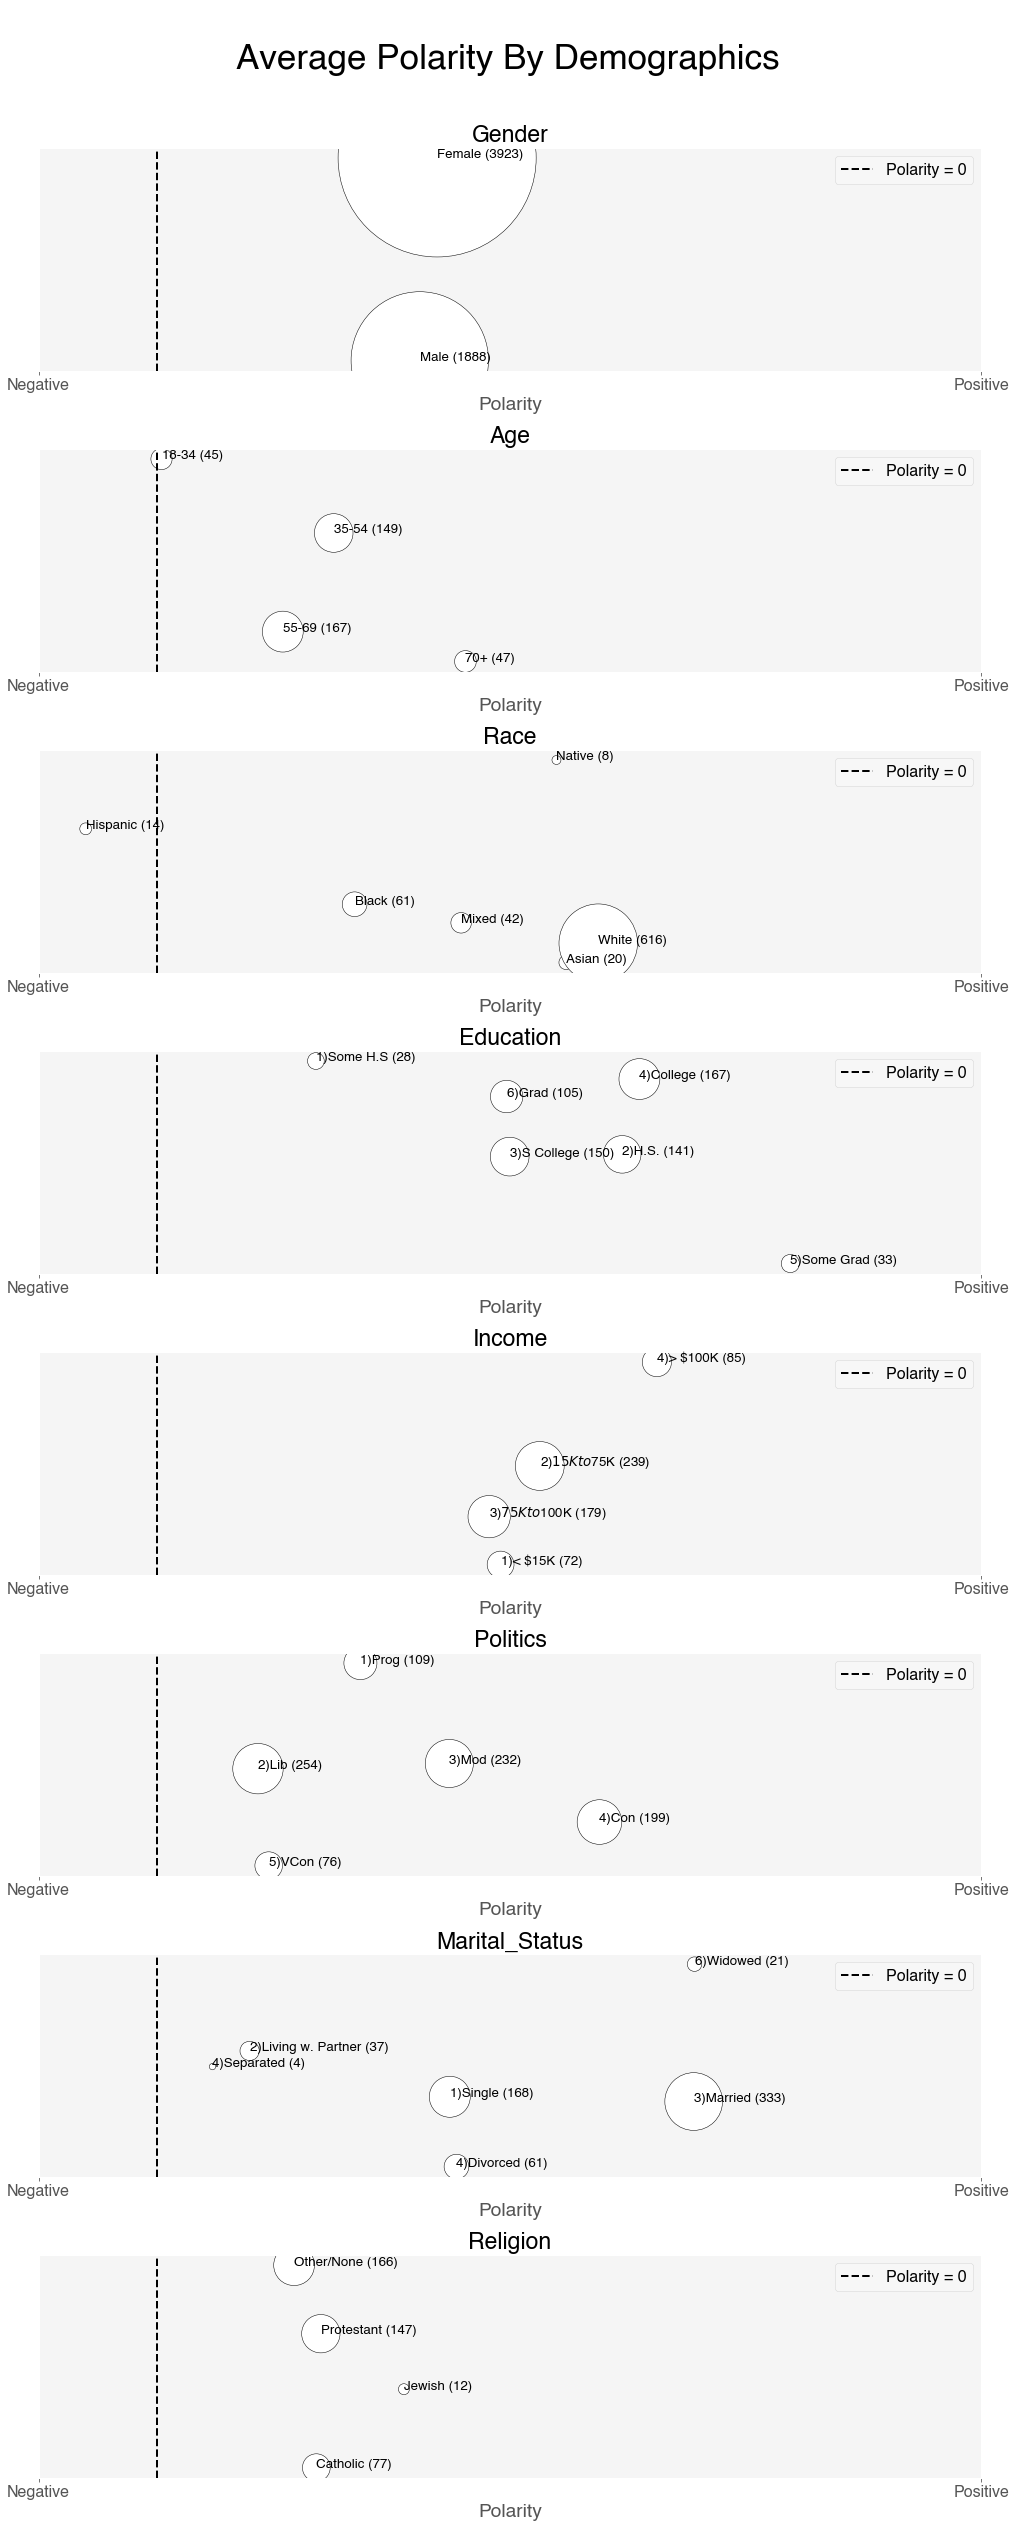

In [2305]:
demographics = ['Gender','Age', 'Race', 'Education', 'Income', 'Politics', 'Marital_Status', 'Religion']


fig, axs = plt.subplots(len(demographics), 1, figsize=(14,35), constrained_layout=True)

for i, ax in enumerate(axs):
    ax = plot_scatter(demographics[i])
    
fig.suptitle('\nAverage Polarity By Demographics\n', fontsize=35)
fig.savefig('../img/polarity_by_demo.jpg');

### Measure the Mean Tone Scores For Each Demographic Group

In [2228]:
bright_colors = ['#FF1137', '#628290', '#963FB8', '#FBC400', '#0FAF28', '#00B0F5', '#B40548' ]
deep_colors   = ['#BC0750', '#0c1f27', '#4344B6', '#E97C13', '#018482', '#030B6F',  '#600B20']

In [2150]:
emotion_bright_colors = ['#FF1137', '#628290', '#963FB8', '#FBC400' ]
emotion_deep_colors   = ['#BC0750', '#0c1f27', '#4344B6',  '#E97C13']

lang_bright_colors = ['#0FAF28', '#00B0F5', '#B40548' ]
lang_deep_colors   = ['#018482', '#030B6F',  '#600B20']

In [2176]:
def plot_grouped_bar_means(demographic):

    dream_demographics_df = dream_df.groupby(demographic).agg('mean')[emotion_cols]
    demographic_names = dream_demographics_df.index
    tone_names = dream_demographics_df.columns


    x = np.arange(len(demographic_names))  
    bar_width = 0.1


    for j in range(len(tone_names)):
        bars = [dream_demographics_df.iloc[i,j] for i in range(len(dream_demographics_df.index))]
        ax.bar(x+bar_width*j, bars, width=bar_width, label=emotion_cols[j], color=emotion_bright_colors[j])
        
        for k, bar_h in enumerate(bars):
            ax.annotate(f'{bar_h:.2f}', ((x+bar_width*j)[k], bars[k]*0.9), color='black', fontsize='x-large', ha='center')



    ax.set_xticks(x+0.2)
    ax.set_xticklabels(list(demographic_names), fontsize=30)

    ax.set_ylabel('Score')
    ax.set_title(demographic, fontsize=60)


    ax.legend(loc="upper left", ncol=len(tone_names))


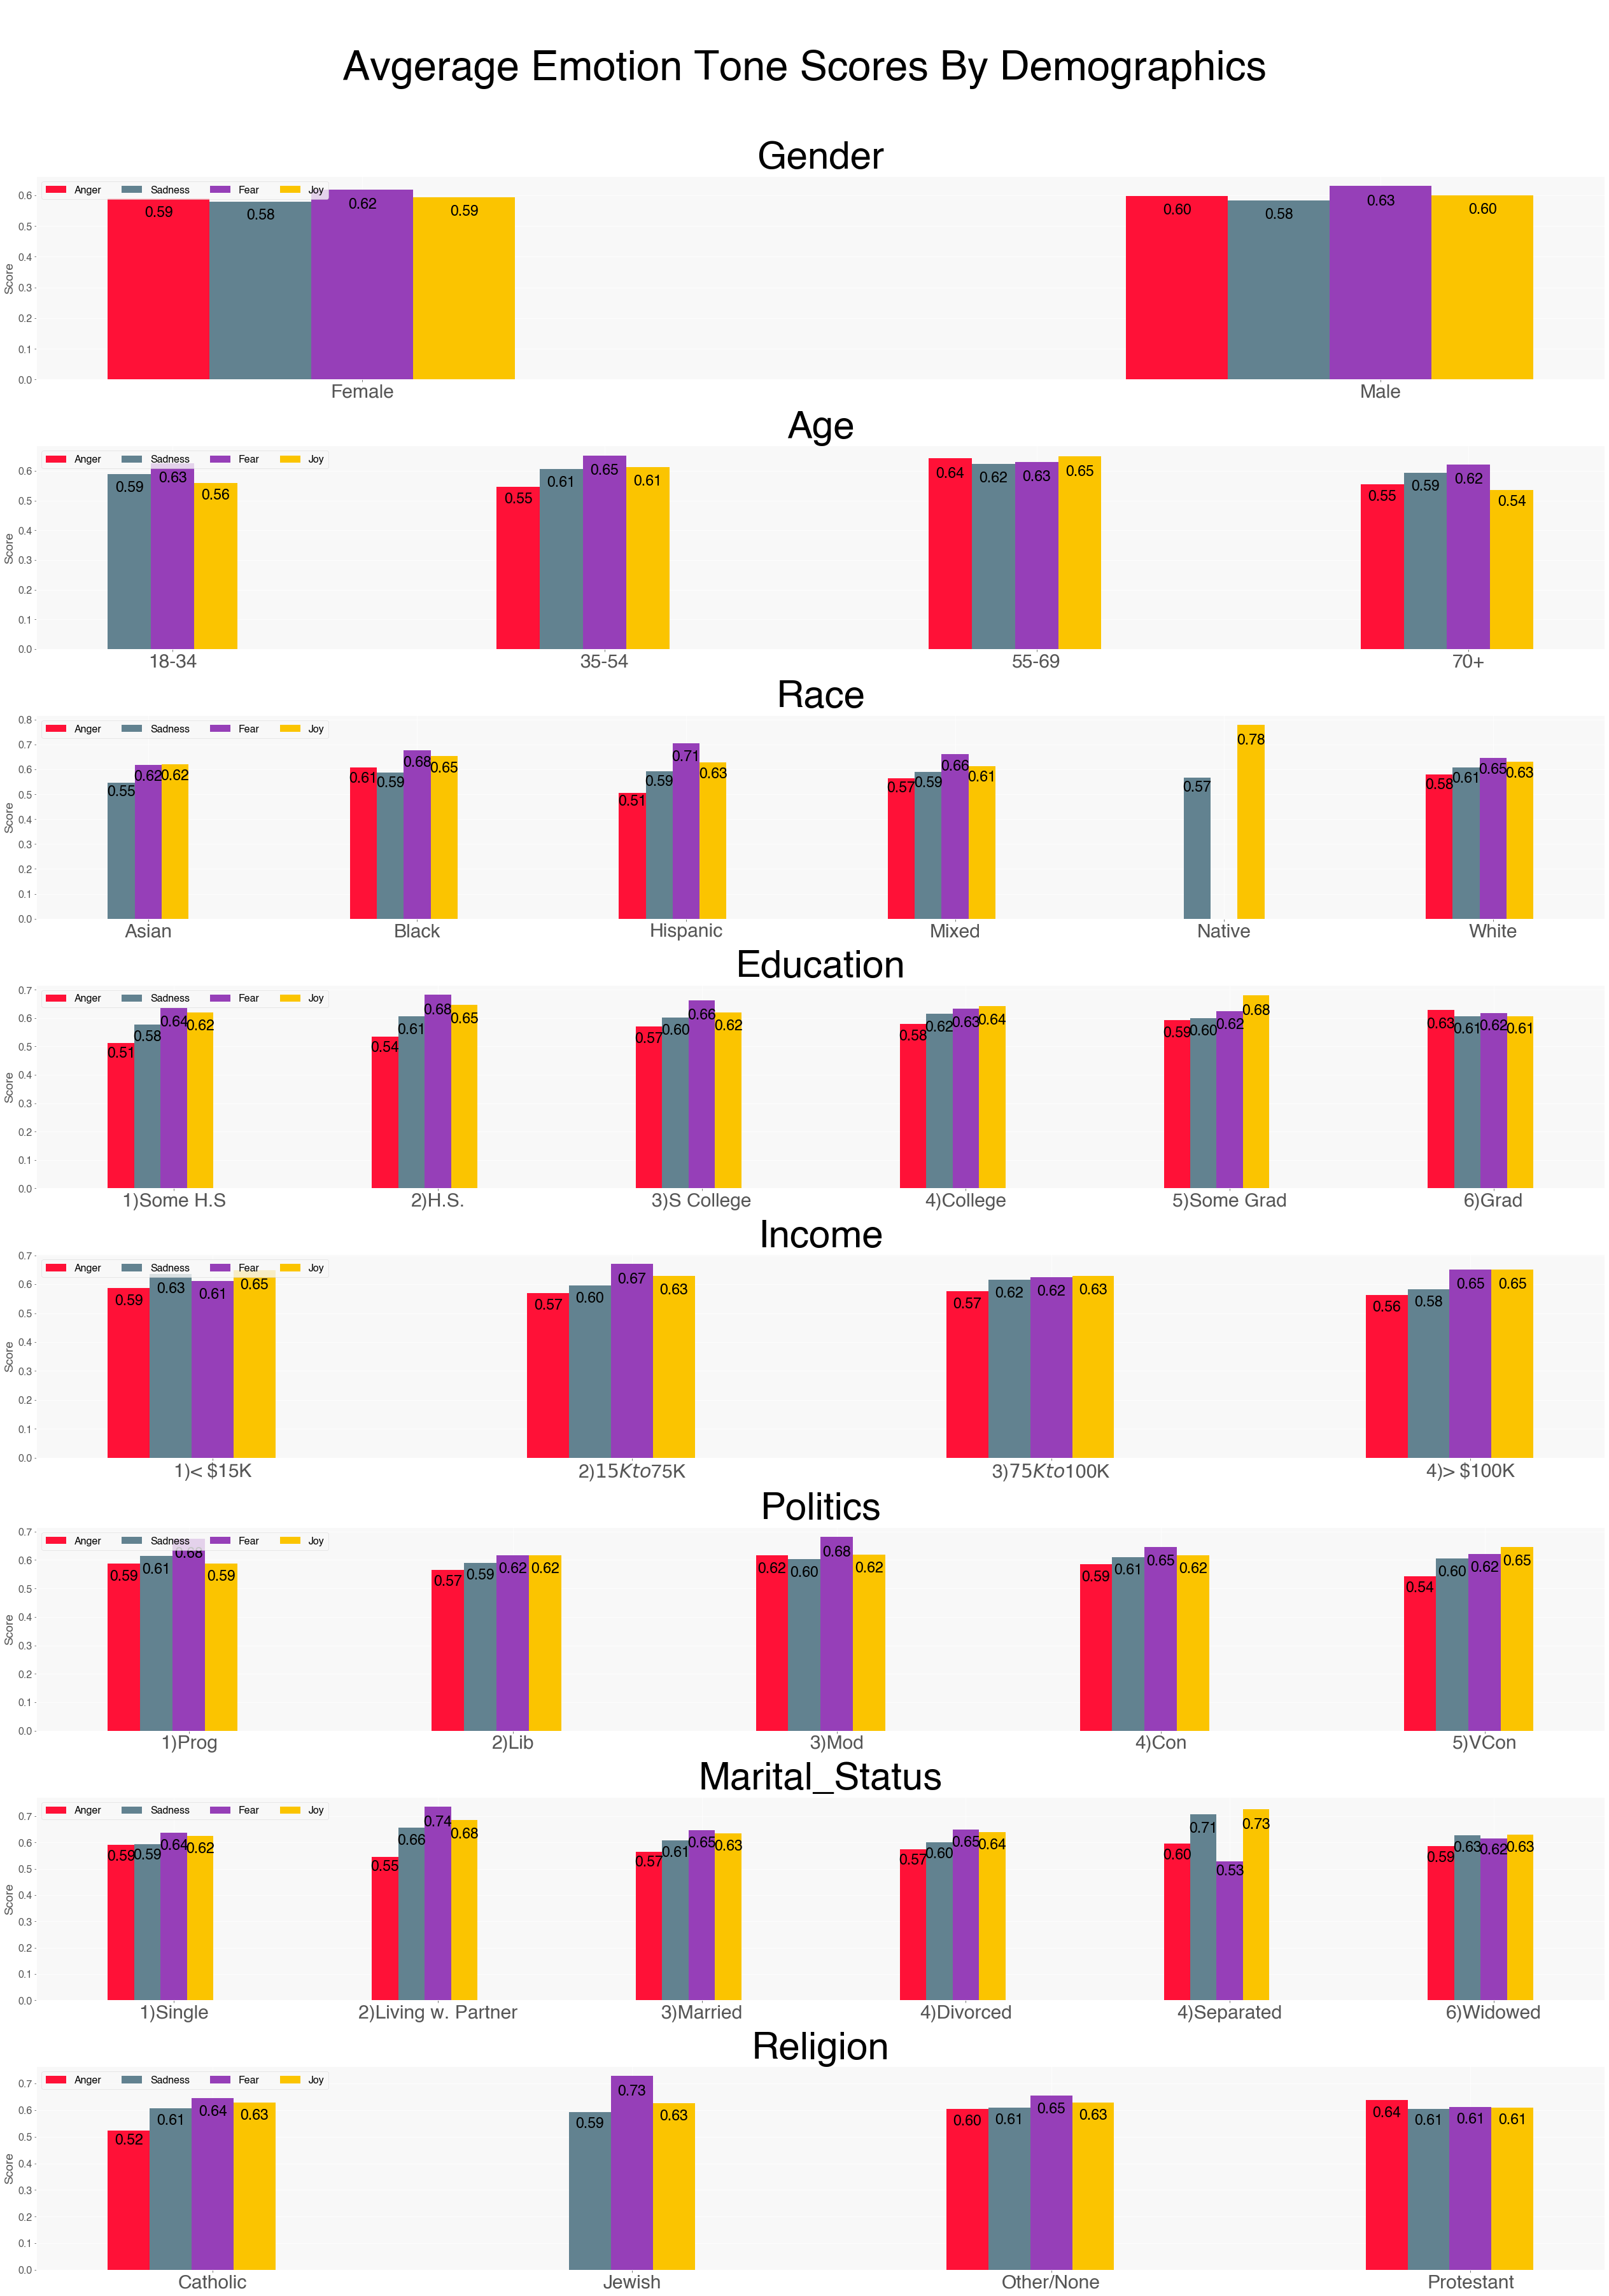

In [2293]:
demographics = ['Gender','Age', 'Race', 'Education', 'Income', 'Politics', 'Marital_Status', 'Religion']


fig, axs = plt.subplots(len(demographics), 1, figsize=(35,50), constrained_layout=True)

for i, ax in enumerate(axs):
    ax = plot_grouped_bar_means(demographics[i])
    
fig.suptitle('\nAvgerage Emotion Tone Scores By Demographics\n', fontsize=65)
fig.savefig('../img/tones_by_demo.jpg');

''

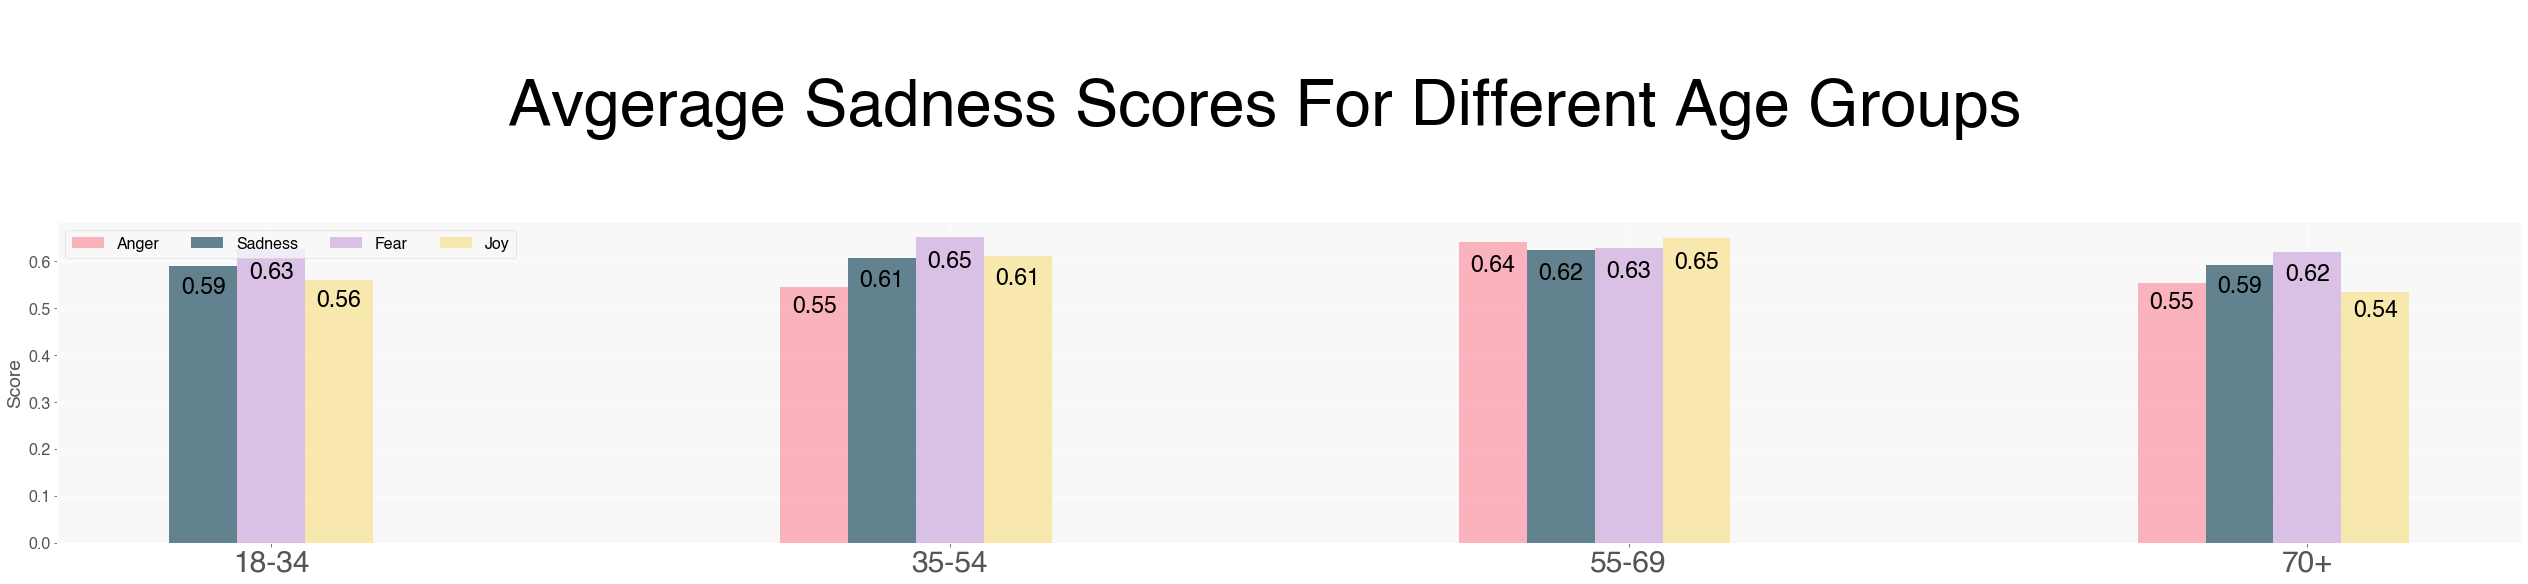

In [2306]:
demographic = 'Age'

dream_demographics_df = dream_df.groupby(demographic).agg('mean')[emotion_cols]
demographic_names = dream_demographics_df.index
tone_names = dream_demographics_df.columns


x = np.arange(len(demographic_names))  
bar_width = 0.1

fig, ax = plt.subplots(figsize=(35,8), constrained_layout=True)

for j in range(len(tone_names)):
    bars = [dream_demographics_df.iloc[i,j] for i in range(len(dream_demographics_df.index))]
    if tone_cols[j] == 'Sadness':
        ax.bar(x+bar_width*j, bars, width=bar_width, label=emotion_cols[j], color=emotion_bright_colors[j])
    else:
        ax.bar(x+bar_width*j, bars, width=bar_width, label=emotion_cols[j], color=emotion_bright_colors[j], alpha=0.3)
    
    for k, bar_h in enumerate(bars):
        ax.annotate(f'{bar_h:.2f}', ((x+bar_width*j)[k], bars[k]*.9), color='black', fontsize='x-large', ha='center')


ax.set_xticks(x+0.2)
ax.set_xticklabels(list(demographic_names), fontsize=30)

ax.set_ylabel('Score')


ax.legend(loc="upper left", ncol=len(tone_names))

fig.suptitle('\nAvgerage Sadness Scores For Different Age Groups\n', fontsize=65)
;

In [2141]:
dream_df['Anger_Flag'] = dream_df.Anger.apply(lambda x: 0 if isnan(x) else 1)
dream_df['Sadness_Flag'] = dream_df.Sadness.apply(lambda x: 0 if isnan(x) else 1)
dream_df['Fear_Flag'] = dream_df.Fear.apply(lambda x: 0 if isnan(x) else 1)
dream_df['Joy_Flag'] = dream_df.Joy.apply(lambda x: 0 if isnan(x) else 1)

dream_df['Tentative_Flag'] = dream_df.Tentative.apply(lambda x: 0 if isnan(x) else 1)
dream_df['Analytical_Flag'] = dream_df.Analytical.apply(lambda x: 0 if isnan(x) else 1)
dream_df['Confident_Flag'] = dream_df.Confident.apply(lambda x: 0 if isnan(x) else 1)


### Measure Proportion of Tones For Each Demographic Group

In [2143]:
tone_flag_cols = ['Anger_Flag', 'Sadness_Flag', 'Fear_Flag',  'Joy_Flag', 'Tentative_Flag', 'Analytical_Flag', 'Confident_Flag']
tone_p_cols =['Anger_Flag_p', 'Sadness_Flag_p', 'Fear_Flag_p', 'Joy_Flag_p', 'Tentative_Flag_p', 'Analytical_Flag_p', 'Confident_Flag_p']

emotion_flag_cols = ['Anger_Flag', 'Sadness_Flag', 'Fear_Flag',  'Joy_Flag']
emotion_p_cols =  ['Anger_Flag_p', 'Sadness_Flag_p', 'Fear_Flag_p', 'Joy_Flag_p']

lang_flag_cols = ['Tentative_Flag', 'Analytical_Flag', 'Confident_Flag']
lang_p_cols = ['Tentative_Flag_p', 'Analytical_Flag_p', 'Confident_Flag_p']

In [2189]:
def plot_grouped_bar_ps(demographic, columns, colors, labels):
    
    dream_grouped_df = dream_df.groupby(demographic).agg(['sum','count'])[tone_flag_cols]
    dream_grouped_df.columns = ['_'.join(col) for col in dream_grouped_df.columns]


    dream_grouped_df['Anger_Flag_p'] = round(dream_grouped_df['Anger_Flag_sum'] / 
                                             dream_grouped_df['Anger_Flag_count'],2)
    dream_grouped_df['Sadness_Flag_p'] = round(dream_grouped_df['Sadness_Flag_sum'] / 
                                            dream_grouped_df['Sadness_Flag_count'],2)
    dream_grouped_df['Fear_Flag_p'] = round(dream_grouped_df['Fear_Flag_sum'] / 
                                            dream_grouped_df['Fear_Flag_count'],2)
    dream_grouped_df['Joy_Flag_p'] = round(dream_grouped_df['Joy_Flag_sum'] / 
                                            dream_grouped_df['Joy_Flag_count'],2)
    
    dream_grouped_df['Tentative_Flag_p'] = round(dream_grouped_df['Tentative_Flag_sum'] / 
                                            dream_grouped_df['Tentative_Flag_count'],2)
    dream_grouped_df['Analytical_Flag_p'] = round(dream_grouped_df['Analytical_Flag_sum'] / 
                                            dream_grouped_df['Analytical_Flag_count'],2)
    dream_grouped_df['Confident_Flag_p'] = round(dream_grouped_df['Confident_Flag_sum'] / 
                                            dream_grouped_df['Confident_Flag_count'],2)

    dream_demographics_df = dream_grouped_df[columns]
    demographic_names = dream_demographics_df.index
    tone_names = dream_demographics_df.columns


    x = np.arange(len(demographic_names))  
    bar_width = 0.1


    for j in range(len(tone_names)):
        bars = [dream_demographics_df.iloc[i,j] for i in range(len(dream_demographics_df.index))]
        ax.bar(x+bar_width*j, bars, width=bar_width, label=labels[j], color=colors[j])
        
        for k, bar_h in enumerate(bars):
            ax.annotate(f'{bar_h:.2f}', ((x+bar_width*j)[k], bars[k]*0.9), color='black', 
                        fontsize='large', ha='center')



    ax.set_xticks(x+0.2)
    ax.set_xticklabels(list(demographic_names), fontsize=30)

    ax.set_ylabel('Score')
    ax.set_title(demographic, fontsize=60)


    ax.legend(loc="upper left", ncol=len(tone_names))


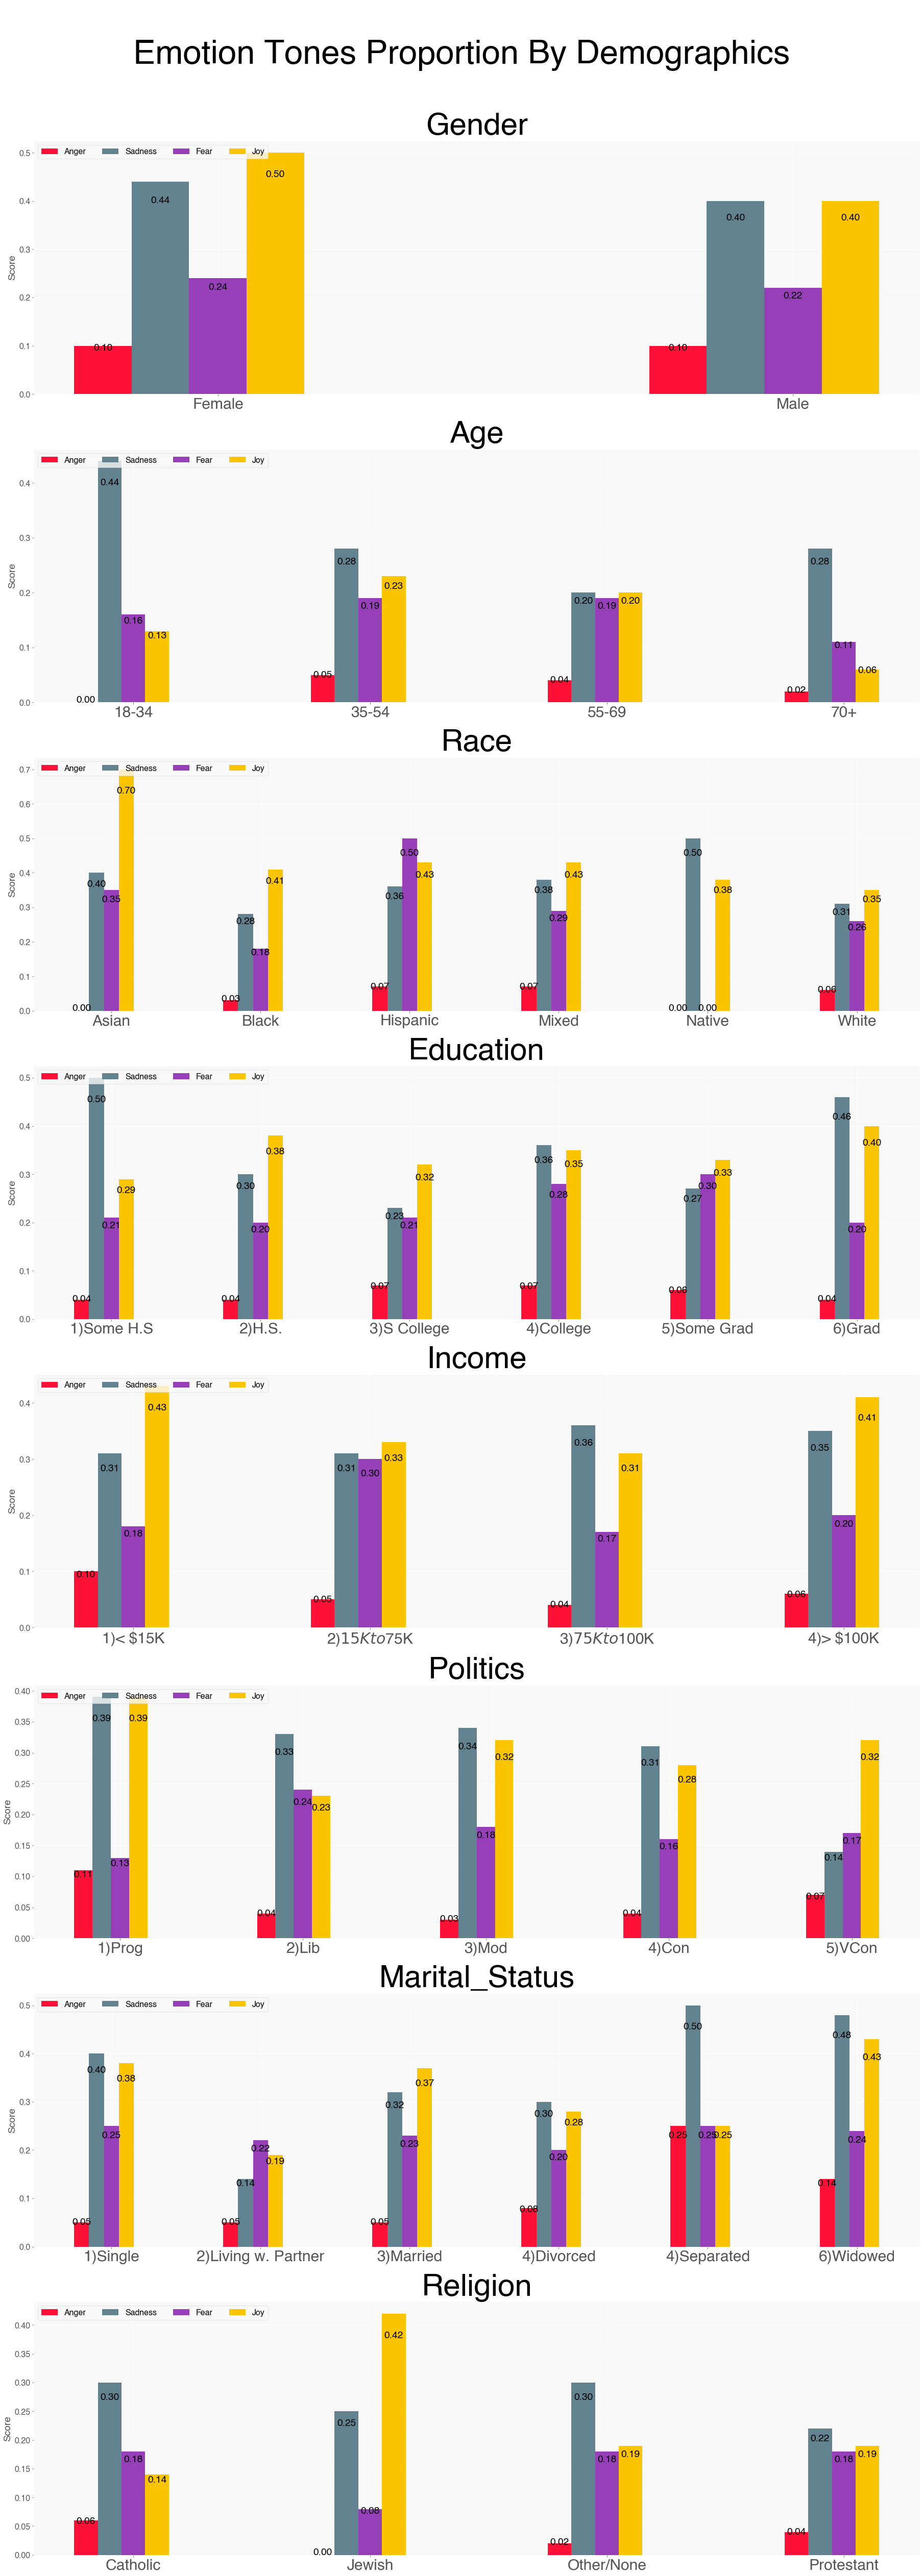

In [2294]:
demographics = ['Gender','Age', 'Race', 'Education', 'Income', 'Politics', 'Marital_Status', 'Religion']


fig, axs = plt.subplots(len(demographics), 1, figsize=(25,70), constrained_layout=True)

for i, ax in enumerate(axs):
    ax = plot_grouped_bar_ps(demographics[i], emotion_p_cols, emotion_bright_colors, emotion_cols)
    
fig.suptitle('\nEmotion Tones Proportion By Demographics\n', fontsize=65)
fig.savefig('../img/emotion_tones_proportions_by_demo.jpg');

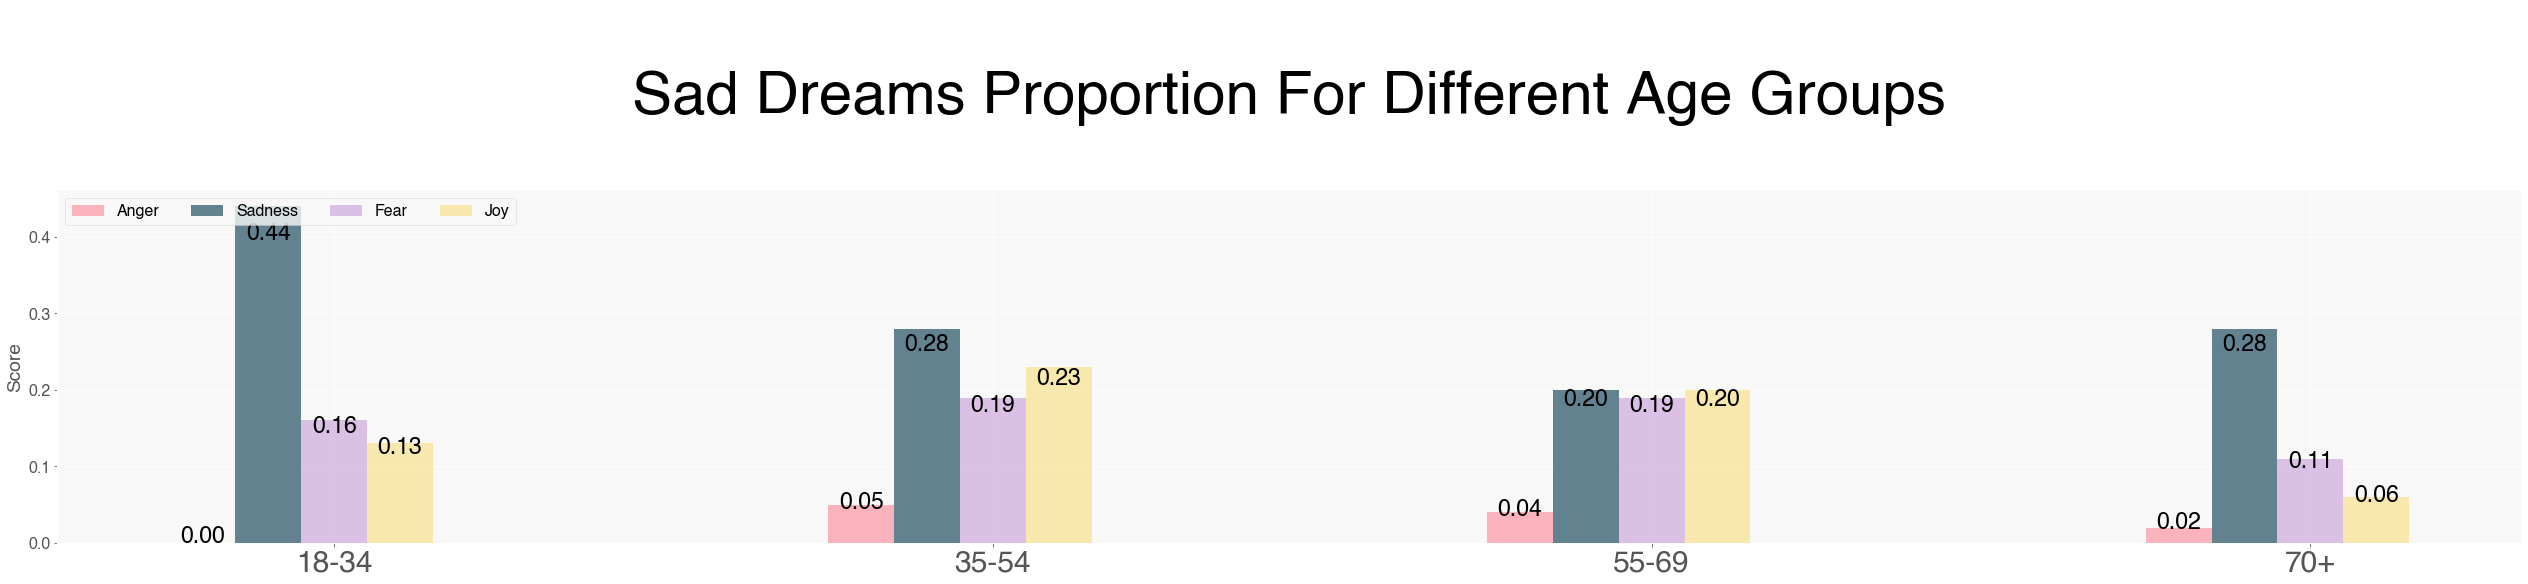

In [2309]:
demographic = 'Age'

dream_grouped_df = dream_df.groupby(demographic).agg(['sum','count'])[tone_flag_cols]
dream_grouped_df.columns = ['_'.join(col) for col in dream_grouped_df.columns]


dream_grouped_df['Anger_Flag_p'] = round(dream_grouped_df['Anger_Flag_sum'] / 
                                             dream_grouped_df['Anger_Flag_count'],2)
dream_grouped_df['Sadness_Flag_p'] = round(dream_grouped_df['Sadness_Flag_sum'] / 
                                            dream_grouped_df['Sadness_Flag_count'],2)
dream_grouped_df['Fear_Flag_p'] = round(dream_grouped_df['Fear_Flag_sum'] / 
                                            dream_grouped_df['Fear_Flag_count'],2)
dream_grouped_df['Joy_Flag_p'] = round(dream_grouped_df['Joy_Flag_sum'] / 
                                            dream_grouped_df['Joy_Flag_count'],2)
    
dream_grouped_df['Tentative_Flag_p'] = round(dream_grouped_df['Tentative_Flag_sum'] / 
                                            dream_grouped_df['Tentative_Flag_count'],2)
dream_grouped_df['Analytical_Flag_p'] = round(dream_grouped_df['Analytical_Flag_sum'] / 
                                            dream_grouped_df['Analytical_Flag_count'],2)
dream_grouped_df['Confident_Flag_p'] = round(dream_grouped_df['Confident_Flag_sum'] / 
                                            dream_grouped_df['Confident_Flag_count'],2)
    
dream_demographics_df = dream_grouped_df[emotion_p_cols]
demographic_names = dream_demographics_df.index
tone_names = dream_demographics_df.columns


x = np.arange(len(demographic_names))  
bar_width = 0.1

fig, ax = plt.subplots(figsize=(35,8), constrained_layout=True)

for j in range(len(tone_names)):
    bars = [dream_demographics_df.iloc[i,j] for i in range(len(dream_demographics_df.index))]
    if tone_cols[j] == 'Sadness':
        ax.bar(x+bar_width*j, bars, width=bar_width, label=emotion_cols[j], color=emotion_bright_colors[j])
    else:
        ax.bar(x+bar_width*j, bars, width=bar_width, label=emotion_cols[j], color=emotion_bright_colors[j], alpha=0.3)
        
        
    for k, bar_h in enumerate(bars):
        ax.annotate(f'{bar_h:.2f}', ((x+bar_width*j)[k], bars[k]*0.9), color='black', fontsize='x-large', ha='center')



ax.set_xticks(x+0.2)
ax.set_xticklabels(list(demographic_names), fontsize=30)

ax.set_ylabel('Score')
ax.set_title('\nSad Dreams Proportion For Different Age Groups\n', fontsize=60)


ax.legend(loc="upper left", ncol=len(tone_names))

fig.savefig('../img/sadness_proportions_two_age_groups.jpg');


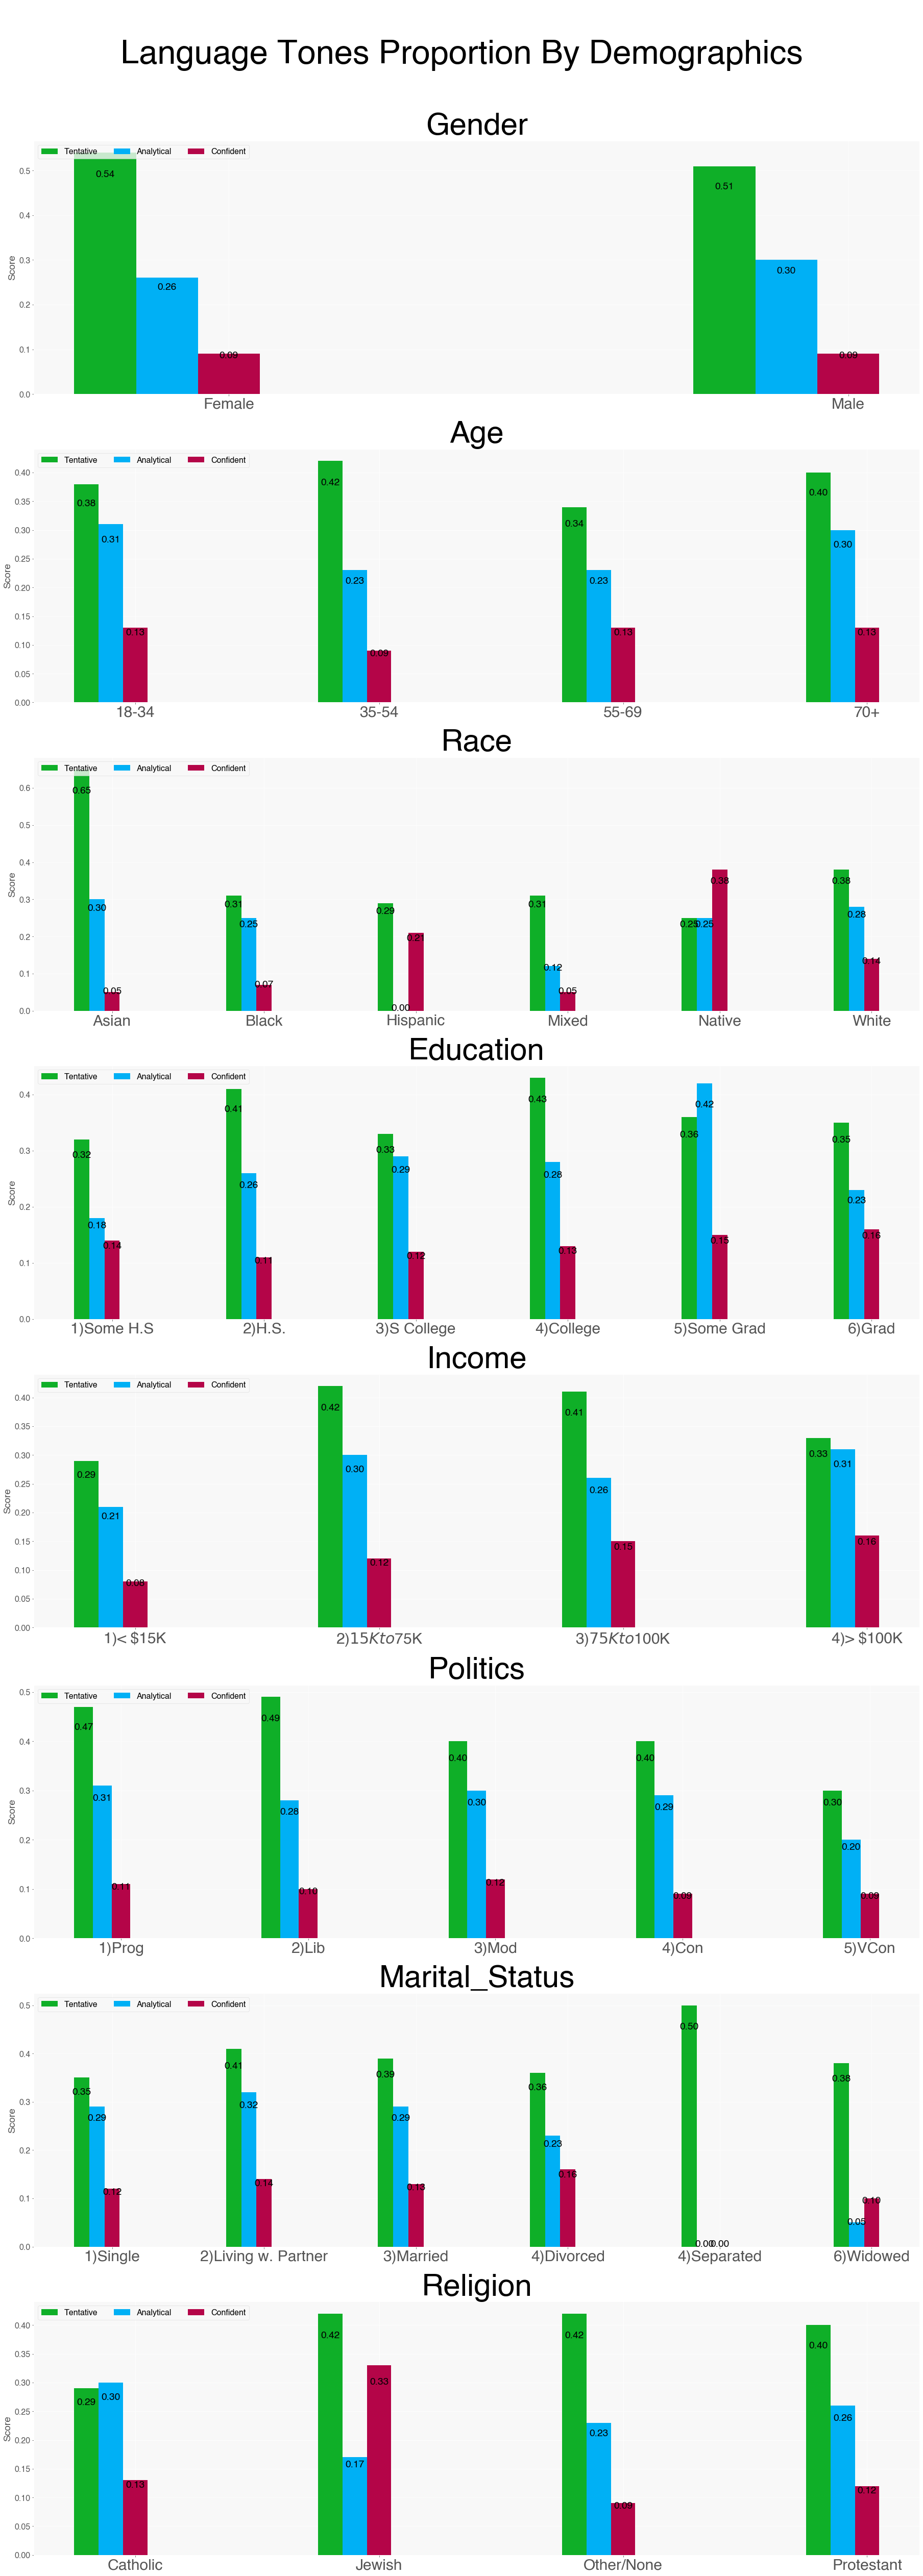

In [2295]:
demographics = ['Gender','Age', 'Race', 'Education', 'Income', 'Politics', 'Marital_Status', 'Religion']


fig, axs = plt.subplots(len(demographics), 1, figsize=(25,70), constrained_layout=True)

for i, ax in enumerate(axs):
    ax = plot_grouped_bar_ps(demographics[i], lang_p_cols, lang_bright_colors, lang_cols)
    
fig.suptitle('\nLanguage Tones Proportion By Demographics\n', fontsize=65)
fig.savefig('../img/lang_tones_proportions_by_demo.jpg');

### Assess the Average Tone Scores for Female vs Male

In [2204]:
dream_gender_mean = dream_df.groupby('Gender').agg('mean')[emotion_cols]
dream_gender_std = dream_df.groupby('Gender').agg('std')[emotion_cols]

dream_gender_mean

,Anger,Sadness,Fear,Joy
Gender,,,,
Female,0.589658,0.580302,0.618611,0.593786
Male,0.598037,0.583040,0.631172,0.600267


In [2205]:
dream_gender_std

,Anger,Sadness,Fear,Joy
Gender,,,,
Female,0.070387,0.062554,0.081943,0.066674
Male,0.080160,0.060310,0.095466,0.078202


''

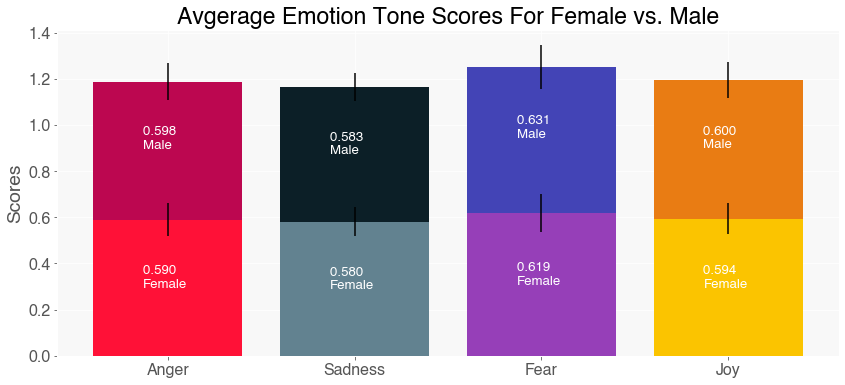

In [2207]:
female_means = dream_gender_mean.loc['Female']
female_std = dream_gender_std.loc['Female']

male_means = dream_gender_mean.loc['Male']
male_std = dream_gender_std.loc['Male']

# width = 0.1

fig, ax = plt.subplots(figsize=(14,6))

ax1 = ax.bar(emotion_cols, female_means, yerr=female_std, label='Bottom - Female', color=emotion_bright_colors)
ax2 = ax.bar(emotion_cols, male_means, yerr=male_std, label='Top - Male', bottom=female_means, color=emotion_deep_colors)

ax.set_ylabel('Scores')
ax.set_title('Avgerage Emotion Tone Scores For Female vs. Male')
# ax.legend(fontsize='xx-small', loc=2)


for r_female, r_male in zip(ax1, ax2):
    height_female = r_female.get_height()
    height_male = r_male.get_height()
    plt.text(r_female.get_x() + r_female.get_width() / 3, height_female/2, f'{height_female:.3f} \nFemale', 
             color='white', size='small')
    plt.text(r_male.get_x() + r_male.get_width() / 3, height_male*1.5, f'{height_male:.3f} \nMale', 
             color='white',  size='small')

    
fig.savefig('../img/avg_tones_female_vs_male.jpg')
;

### Assess the Average Proportions of Emotion Tones for Older vs Younger Adults

In [2265]:
dream_age_p_df = dream_df[['ID','Age', 'Anger', 'Sadness',  'Fear', 'Joy',
                          'Anger_Flag', 'Sadness_Flag',  'Fear_Flag', 'Joy_Flag', 'Counter']]


dream_age_p_df.Age = dream_age_p_df.Age.replace('18-34','18-54')
dream_age_p_df.Age = dream_age_p_df.Age.replace('35-54','18-54')
dream_age_p_df.Age = dream_age_p_df.Age.replace('55-69','55+')
dream_age_p_df.Age = dream_age_p_df.Age.replace('70+','55+')

dream_age_p_df = dream_age_p_df.groupby('Age').agg(['sum','count'])[emotion_flag_cols]
dream_age_p_df.columns = ['_'.join(col) for col in dream_age_p_df.columns]

dream_age_p_df['Anger_Flag_p'] = round(dream_age_p_df.Anger_Flag_sum / 
                                        dream_age_p_df.Anger_Flag_count,2)
dream_age_p_df['Sadness_Flag_p'] = round(dream_age_p_df.Sadness_Flag_sum / 
                                        dream_age_p_df.Sadness_Flag_count,2)
dream_age_p_df['Fear_Flag_p'] = round(dream_age_p_df.Fear_Flag_sum / 
                                        dream_age_p_df.Fear_Flag_count,2)
dream_age_p_df['Joy_Flag_p'] = round(dream_age_p_df.Joy_Flag_sum / 
                                        dream_age_p_df.Joy_Flag_count,2)


dream_age_mean = dream_age_p_df.groupby('Age').agg('mean')[emotion_p_cols]
dream_age_mean

,Anger_Flag_p,Sadness_Flag_p,Fear_Flag_p,Joy_Flag_p
Age,,,,
18-54,0.04,0.32,0.19,0.21
55+,0.04,0.21,0.17,0.17


''

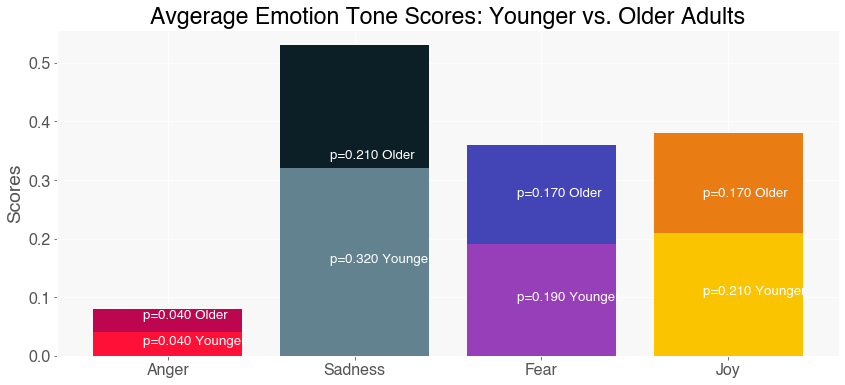

In [2276]:
younger_means = dream_age_mean.loc['18-54']
older_means = dream_age_mean.loc['55+']




fig, ax = plt.subplots(figsize=(14,6))

ax1 = ax.bar(emotion_cols, younger_means,  label='Bottom - Younger', color=emotion_bright_colors)
ax2 = ax.bar(emotion_cols, older_means,  label='Top - Older', bottom=younger_means, color=emotion_deep_colors)

ax.set_ylabel('Scores')
ax.set_title('Avgerage Emotion Tone Scores: Younger vs. Older Adults')

for r_younger, r_older in zip(ax1, ax2):
    height_younger = r_younger.get_height()
    height_older = r_older.get_height()
    plt.text(r_younger.get_x() + r_younger.get_width() / 3, height_younger/2, f'p={height_younger:.3f} Younger', 
             color='white', size='small')
    plt.text(r_older.get_x() + r_older.get_width() / 3, height_older* 1.6, f'p={height_older:.3f} Older', 
             color='white',  size='small')

    
fig.savefig('../img/avg_tones_younger_vs_older.jpg')
;

## IV. Perform Hypothesis Testing

In [2248]:
dream_age_df = dream_df[['ID','Date','Age','Polarity', 'Subjectivity', 
                             'Anger', 'Sadness',  'Fear', 'Joy', 
                         'Tentative', 'Analytical', 'Confident']]


dream_age_df.Age = dream_age_df.Age.replace('18-34','18-54')
dream_age_df.Age = dream_age_df.Age.replace('35-54','18-54')
dream_age_df.Age = dream_age_df.Age.replace('55-69','55+')
dream_age_df.Age = dream_age_df.Age.replace('70+','55+')


dream_age_df['Sadness_Flag'] = dream_age_df.Sadness.apply(lambda x: 0 if isnan(x) else 1)

dream_age_grouped_df  = dream_age_df.groupby('Age').agg(['sum','count']).loc[:,['Sadness_Flag']]
dream_age_grouped_df.columns = ['_'.join(col) for col in dream_age_grouped_df.columns]
dream_age_grouped_df.reset_index(inplace=True)

dream_age_grouped_df = dream_age_grouped_df.append(dream_age_grouped_df.sum(numeric_only=True).rename('Total'))

dream_age_grouped_df['Sadness_Flag_p'] = round(dream_age_grouped_df['Sadness_Flag_sum'] / 
                                               dream_age_grouped_df['Sadness_Flag_count'],2)


dream_age_grouped_df

,Age,Sadness_Flag_sum,Sadness_Flag_count,Sadness_Flag_p
0,18-54,62.0,194.0,0.32
1,55+,46.0,214.0,0.21
Total,NaN,108.0,408.0,0.26


### Difference in Two Proportions Hypothesis Tests

### Proportion on Sad Dreams in Younger Adults in Comparison to Older Adults; Two-Tailed Test

Ho: younger vs older adults have equal proportions of sad dreams<br>
Ha: sadness dream proportions are different between those two groups

$H_o$: $p_y$ - $p_o$ = 0; $p_y$ = $p_o$<br>
$H_a$: |$p_y$ - $p_o$|  $\neq$ 0;

$\alpha$ = 5%

In [2227]:
alpha = 0.05
confidence_level = 1-alpha

p_younger = dream_age_grouped_df.loc[0,'Sadness_Flag_p']
p_older = dream_age_grouped_df.loc[1,'Sadness_Flag_p']
p_pooled = dream_age_grouped_df.loc['Total','Sadness_Flag_p']

n_younger = dream_age_grouped_df.loc[0,'Sadness_Flag_count']
n_older = dream_age_grouped_df.loc[1,'Sadness_Flag_count']

se = np.sqrt(p_pooled*(1-p_pooled)*(1/n_younger + 1/n_older))

# 0 because under the null hypothesis there is no difference between the two proportions
z = (p_younger - p_older - 0) / se

''

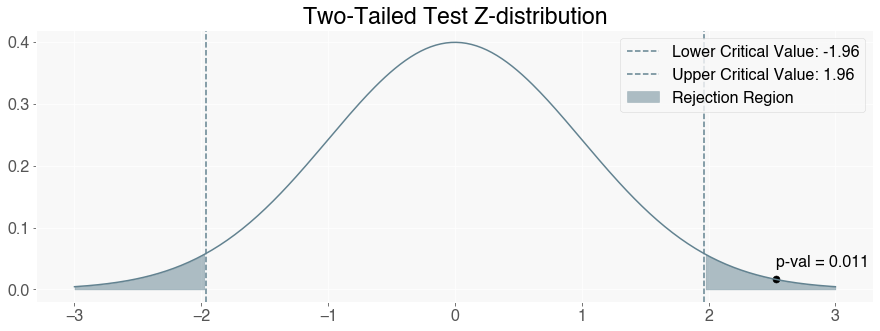

In [2229]:
fig, ax = plt.subplots(figsize=(15,5))

norm = stats.norm()
x = np.linspace(-3, 3, 300)

ax.plot(x, norm.pdf(x), color=bright_colors[1])

ax.axvline(norm.ppf((1-confidence_level)/2), color=bright_colors[1], ls='--', 
           label=f'Lower Critical Value: {norm.ppf((1-confidence_level)/2):.2f}')
ax.axvline(norm.ppf((1+confidence_level)/2), color=bright_colors[1], ls='--',
          label=f'Upper Critical Value: {norm.ppf((1+confidence_level)/2):.2f}')

ax.fill_between(x, norm.pdf(x), where= (x<norm.ppf((1-confidence_level)/2)), color=bright_colors[1], 
                alpha=0.5, label='Rejection Region')
ax.fill_between(x, norm.pdf(x), where= (x>norm.ppf((1+confidence_level)/2)), color=bright_colors[1], alpha=0.5)

ax.scatter(z, norm.pdf(z), marker='o', s=50, color='black')
p_val = 2*(1 - norm.cdf(z))
ax.text(z, norm.pdf(z)+0.02, s=f'p-val = {p_val:.3f}')

ax.set_title('Two-Tailed Test Z-distribution')
ax.legend(loc=1)

fig.savefig('../img/sad_dreams_two_tailed.jpg')
;

In [1309]:
def boootstrap_sample_ps(data, n_bootstrap_samples=10000):
    bootstrap_sample_ps = []
    
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_ps.append(sum(bootstrap_sample)/len(bootstrap_sample))
        
    return bootstrap_sample_ps

In [2307]:
def plot_hist_dist(group, color=bright_colors[1]):
    bootstrap_ps = boootstrap_sample_ps(dream_age_df.Sadness_Flag[dream_age_df.Age == group])
    bootstrap_ps_mean = np.mean(bootstrap_ps)
    bootstrap_ps_std = np.std(bootstrap_ps)
    norm = stats.norm(bootstrap_ps_mean, bootstrap_ps_std)

    x = np.linspace(min(bootstrap_ps), max(bootstrap_ps), 300)

    ax.plot(x, norm.pdf(x), color, linewidth=4,
           label=f'Age {group}')
    ax.hist(bootstrap_ps, bins=50, density=True, color=color, alpha=0.8)
    
    ax.legend()
    
    ax.set_xlabel('Sad Dreams Proportion')
    ax.set_title('\nBootstrap Sample Proportion \nDistribution for Two Age Groups\n')
    


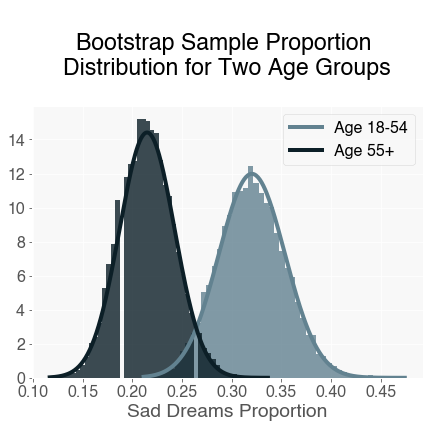

In [2308]:
fig, ax = plt.subplots(figsize=(7,5))

plot_hist_dist('18-54')
plot_hist_dist('55+', deep_colors[1])
fig.savefig('../img/sad_dreams_p_bootstrap.jpg');

### Proportion on Sad Dreams in Younger Adults in Comparison to Older Adults; Right-Tailed Test

Ho: younger vs older adults have equal proportions of sad dreams<br>
Ha: sadness dream proportions are different between those two groups

$H_o$: $p_y$ $\leq$ $p_o$ = 0 <br>
$H_a$: $p_y$ > $p_o$ 0

$\alpha$ = 5%

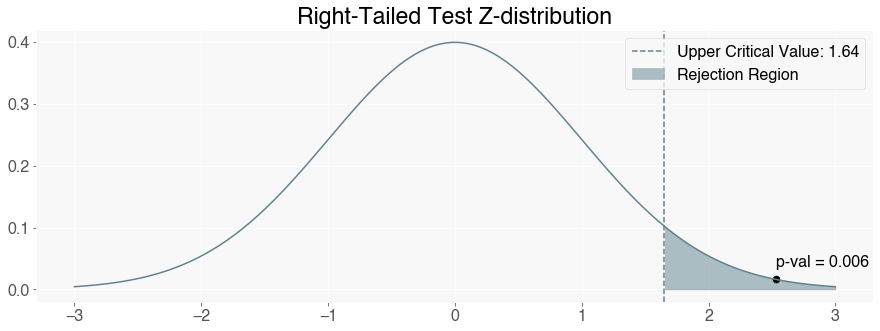

In [2244]:
fig, ax = plt.subplots(figsize=(15,5))

norm = stats.norm()
x = np.linspace(-3, 3, 300)

ax.plot(x, norm.pdf(x), color=bright_colors[1])

ax.axvline(norm.ppf(1-alpha), color=bright_colors[1], ls='--',
          label=f'Upper Critical Value: {norm.ppf(1-alpha):.2f}')


ax.fill_between(x, norm.pdf(x), where= (x>norm.ppf(1-alpha)), color=bright_colors[1], alpha=0.5, 
                label='Rejection Region')

ax.scatter(z, norm.pdf(z), marker='o', s=50, color='black')
p_val = (1 - norm.cdf(z))
ax.text(z, norm.pdf(z)+0.02, s=f'p-val = {p_val:.3f}')

ax.set_title('Right-Tailed Test Z-distribution')
ax.legend(loc=1)

fig.savefig('../img/sad_dreams_right_tailed.jpg');

### Observe the Proportion of Tones Trend Over the Last Decade

In [1517]:
dream_df['Counter'] = np.ones(len(dream_df.index))

In [2245]:
tone_flag_cols_wCounter = ['Anger_Flag', 'Sadness_Flag', 'Fear_Flag', 'Joy_Flag', 'Counter']


In [2301]:
dream_date_grouped_df = dream_df[dream_df.Date > '2009-12-31'].groupby(pd.Grouper(key='Date', freq='Y')).sum()[tone_flag_cols_wCounter]

dream_date_grouped_df['Anger_Flag_p'] = round(dream_date_grouped_df.Anger_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Sadness_Flag_p'] = round(dream_date_grouped_df.Sadness_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Fear_Flag_p'] = round(dream_date_grouped_df.Fear_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Joy_Flag_p'] = round(dream_date_grouped_df.Joy_Flag / 
                                        dream_date_grouped_df.Counter,2)

dream_date_grouped_df.dropna(inplace=True)
dream_date_grouped_df


,Anger_Flag,Sadness_Flag,Fear_Flag,Joy_Flag,Counter,Anger_Flag_p,Sadness_Flag_p,Fear_Flag_p,Joy_Flag_p
Date,,,,,,,,,
2010-12-31,16,110,75,80,421.0,0.04,0.26,0.18,0.19
2011-12-31,39,213,164,253,552.0,0.07,0.39,0.30,0.46
2012-12-31,18,82,30,70,157.0,0.11,0.52,0.19,0.45
2013-12-31,106,514,323,590,1186.0,0.09,0.43,0.27,0.50
2014-12-31,16,112,98,145,295.0,0.05,0.38,0.33,0.49
2015-12-31,201,637,299,652,1432.0,0.14,0.44,0.21,0.46
2016-12-31,5,33,11,23,84.0,0.06,0.39,0.13,0.27
2017-12-31,90,536,205,683,1136.0,0.08,0.47,0.18,0.60
2018-12-31,23,67,39,78,128.0,0.18,0.52,0.30,0.61


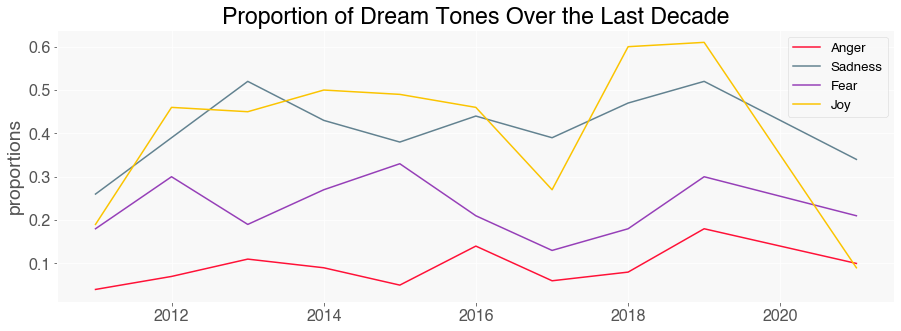

In [2247]:
fig, ax = plt.subplots(figsize=(15,5))

x = dream_date_grouped_df.index

for tone_p, color, tone_name in zip(emotion_p_cols, emotion_bright_colors, emotion_cols):
    y = dream_date_grouped_df[tone_p]
    ax.plot(x, y, c=color, label=tone_name)

ax.legend(loc="upper right", fontsize='small')
ax.set_ylabel('proportions')
ax.set_title('Proportion of Dream Tones Over the Last Decade')
fig.savefig('../img/dreams_proportion_YoY.jpg');

### Test for Proportion Difference in Joyful Dreams for Liberals and Conservatives During Different Presidencies

### Test for Propotion of Joyful Dreams for Conservatives Under Democratic vs Republican President

I expect that joyous dreams were ubiquitous for conservatives during republican's presidency.<br>

Conservatives

$H_o$: $p_{r}$ $\leq$ $p_{d}$ <br>
$H_a$: $p_{r}$ > $p_{d}$

$\alpha$ = 5%



,Anger_Flag,Sadness_Flag,Fear_Flag,Tentative_Flag,Analytical_Flag,Joy_Flag,Counter,Anger_Flag_p,Sadness_Flag_p,Fear_Flag_p,Tentative_Flag_p,Analytical_Flag_p,Joy_Flag_p
Date,,,,,,,,,,,,,
2010-12-31,2,28,17,34,31,24,104.0,0.02,0.27,0.16,0.33,0.30,0.23
2012-12-31,1,6,1,10,5,2,16.0,0.06,0.38,0.06,0.62,0.31,0.12
2013-12-31,4,16,11,24,15,17,64.0,0.06,0.25,0.17,0.38,0.23,0.27
2017-12-31,0,12,3,12,6,12,15.0,0.00,0.80,0.20,0.80,0.40,0.80


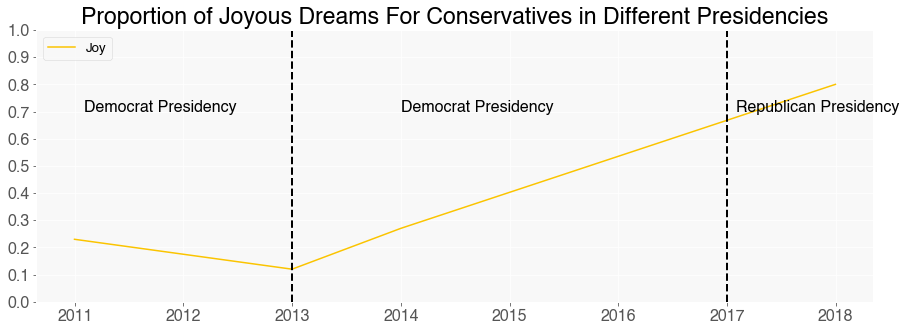

In [2110]:
dream_date_grouped_df = dream_df[ (dream_df.Politics == '4)Con')].groupby(
    pd.Grouper(key='Date', freq='Y')).sum()[tone_flag_cols_wCounter]


dream_date_grouped_df['Anger_Flag_p'] = round(dream_date_grouped_df.Anger_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Sadness_Flag_p'] = round(dream_date_grouped_df.Sadness_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Fear_Flag_p'] = round(dream_date_grouped_df.Fear_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Tentative_Flag_p'] = round(dream_date_grouped_df.Tentative_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Analytical_Flag_p'] = round(dream_date_grouped_df.Analytical_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Joy_Flag_p'] = round(dream_date_grouped_df.Joy_Flag / 
                                        dream_date_grouped_df.Counter,2)

dream_date_grouped_df.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(15,5))

x = dream_date_grouped_df.index

for tone_p, color, tone_name in zip(tone_p_cols, bright_colors, tone_cols):
    if tone_name in ['Joy']:
        y = dream_date_grouped_df[tone_p]
        ax.plot(x, y, c=color, label=tone_name)

ax.axvline(['2016-12-31'], color='black', ls='--', lw=2)
ax.axvline(['2012-12-31'], color='black', ls='--', lw=2)
ax.text(['2011-02-01'],0.7, s='Democrat Presidency')
ax.text(['2013-12-31'],0.7, s='Democrat Presidency')
ax.text(['2017-02-01'],0.7, s='Republican Presidency')

ax.set_yticks(np.linspace(0,1,11))

ax.legend(loc='upper left', fontsize='small')

ax.set_title('Proportion of Joyous Dreams For Conservatives in Different Presidencies')

fig.savefig('../img/joy_dreams_conservatives.jpg');
dream_date_grouped_df

In [2111]:
p_pooled = (dream_date_grouped_df.loc['2013-12-31','Joy_Flag'] + dream_date_grouped_df.loc['2017-12-31','Joy_Flag']
           ) / (dream_date_grouped_df.loc['2013-12-31','Counter'] + dream_date_grouped_df.loc['2017-12-31','Counter'])

In [2112]:
alpha = 0.05
confidence_level = 1-alpha

p_t0 = dream_date_grouped_df.loc['2013-12-31','Joy_Flag_p']
p_t1 = dream_date_grouped_df.loc['2017-12-31','Joy_Flag_p']
p_pooled = (dream_date_grouped_df.loc['2013-12-31','Joy_Flag'] + dream_date_grouped_df.loc['2017-12-31','Joy_Flag']
           ) / (dream_date_grouped_df.loc['2013-12-31','Counter'] + dream_date_grouped_df.loc['2017-12-31','Counter'])

n_t0 = dream_date_grouped_df.loc['2013-12-31','Counter']
n_t1 = dream_date_grouped_df.loc['2017-12-31','Counter']

pooled_std = np.sqrt(p_pooled*(1-p_pooled)*(1/n_t0 + 1/n_t1))
diff_p =  p_t1 - p_t0
z = (diff_p - 0) / pooled_std

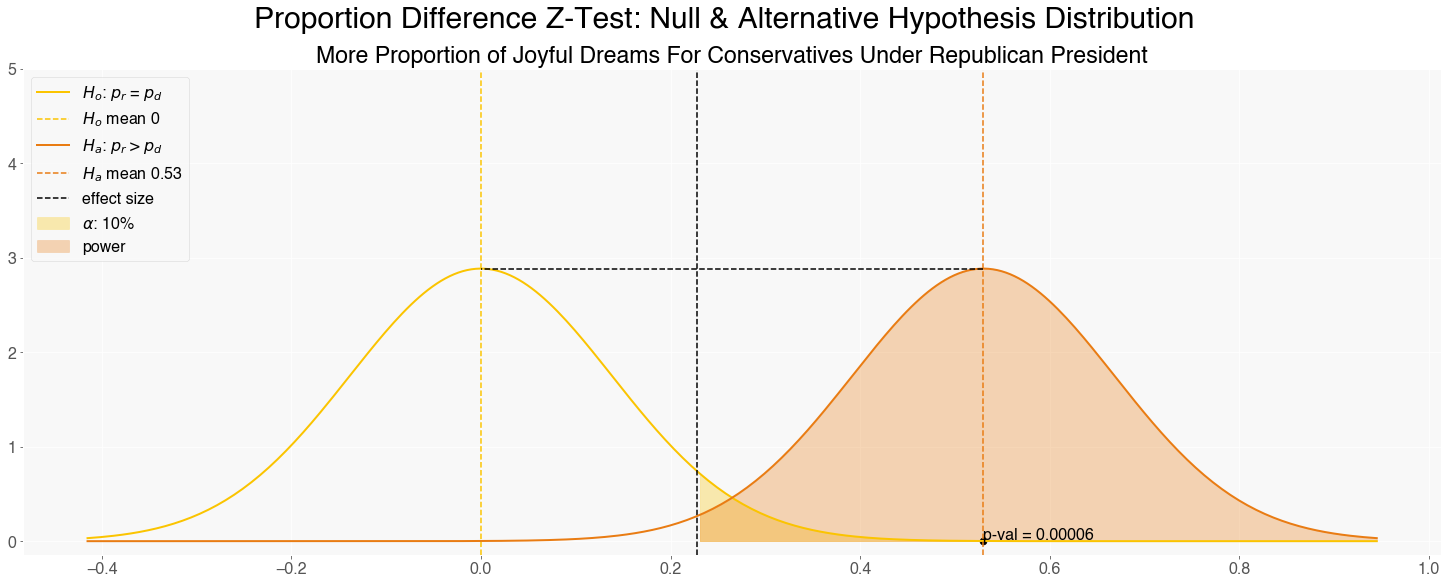

In [2114]:
fig, ax = plt.subplots(figsize=(20,8), constrained_layout=True)

x = np.linspace(0-3*pooled_std, diff_p+3*pooled_std, 300)
null_dist = stats.norm(0,pooled_std)
alt_dist = stats.norm(diff_p,pooled_std)
critical_value = null_dist.ppf(1- alpha)

ax.plot(x, null_dist.pdf(x), linewidth=2, label='$H_o$: $p_r$ = $p_d$', color=bright_colors[-1])
ax.axvline(null_dist.ppf(1-alpha), color='black', ls='--')
ax.fill_between(x, null_dist.pdf(x), where= (x>critical_value), 
                color=bright_colors[-1], alpha=0.3, label=r'$\alpha$: 10%')
ax.axvline(0, color=bright_colors[-1], ls='--', label='$H_o$ mean 0')




ax.plot(x, alt_dist.pdf(x), linewidth=2, label='$H_a$: $p_r$ > $p_d$', color=deep_colors[-1] )
ax.fill_between(x, alt_dist.pdf(x), where= (x>critical_value), 
                color=deep_colors[-1], alpha=0.3 , label=r'power')
ax.axvline(diff_p, color=deep_colors[-1], ls='--', label=f'$H_a$ mean {diff_p}')


ax.plot([diff_p, 0],[ null_dist.pdf(0)]*2, color='black', ls='--', label='effect size')


ax.scatter(diff_p, null_dist.pdf(diff_p), marker='o', s=50, color='black')
p_val = 1 - stats.norm(0, pooled_std).cdf(abs(diff_p))
ax.text(diff_p, null_dist.pdf(diff_p)+0.02, s=f'p-val = {p_val:.5f}')



ax.set_yticks(np.arange(6))
ax.legend(loc='upper left')

ax.set_title('More Proportion of Joyful Dreams For Conservatives Under Republican President')


fig.suptitle('Proportion Difference Z-Test: Null & Alternative Hypothesis Distribution', fontsize=30)

fig.savefig('../img/joy_dreams_conservatives_hypotest.jpg');


In [2047]:
p_val = 1 - stats.norm(0, pooled_std).cdf(abs(diff_p))
p_val

6.328995318571895e-05

### Test for Propotion of Joyful Dreams for Liberals Under Democratic vs Republican President

Joyous dreams were scarce for liberals during republican's presidency.<br>


$H_o$: $p_{d}$ $\leq$ $p_{r}$ <br>
$H_a$: $p_{d}$ > $p_{r}$

$\alpha$ = 5%

,Anger_Flag,Sadness_Flag,Fear_Flag,Tentative_Flag,Analytical_Flag,Joy_Flag,Counter,Anger_Flag_p,Sadness_Flag_p,Fear_Flag_p,Tentative_Flag_p,Analytical_Flag_p,Joy_Flag_p
Date,,,,,,,,,,,,,
2010-12-31,2,34,28,50,30,13,114.0,0.02,0.30,0.25,0.44,0.26,0.11
2012-12-31,3,5,5,9,4,6,17.0,0.18,0.29,0.29,0.53,0.24,0.35
2013-12-31,4,19,19,30,25,22,78.0,0.05,0.24,0.24,0.38,0.32,0.28
2017-12-31,0,27,9,36,12,18,45.0,0.00,0.60,0.20,0.80,0.27,0.40


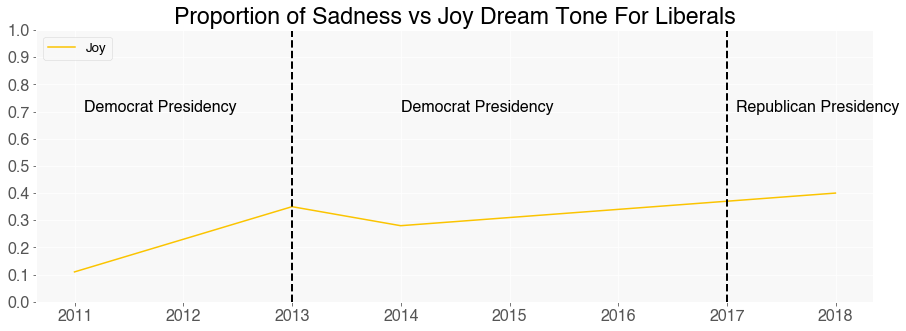

In [2117]:
dream_date_grouped_df = dream_df[ (dream_df.Politics == '2)Lib')].groupby(
    pd.Grouper(key='Date', freq='Y')).sum()[tone_flag_cols_wCounter]


dream_date_grouped_df['Anger_Flag_p'] = round(dream_date_grouped_df.Anger_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Sadness_Flag_p'] = round(dream_date_grouped_df.Sadness_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Fear_Flag_p'] = round(dream_date_grouped_df.Fear_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Tentative_Flag_p'] = round(dream_date_grouped_df.Tentative_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Analytical_Flag_p'] = round(dream_date_grouped_df.Analytical_Flag / 
                                        dream_date_grouped_df.Counter,2)
dream_date_grouped_df['Joy_Flag_p'] = round(dream_date_grouped_df.Joy_Flag / 
                                        dream_date_grouped_df.Counter,2)

dream_date_grouped_df.dropna(inplace=True)

fig, ax = plt.subplots(figsize=(15,5))

x = dream_date_grouped_df.index

for tone_p, color, tone_name in zip(tone_p_cols, bright_colors, tone_cols):
    if tone_name in ['Joy']:
        y = dream_date_grouped_df[tone_p]
        ax.plot(x, y, c=color, label=tone_name)

ax.axvline(['2016-12-31'], color='black', ls='--', lw=2)
ax.axvline(['2012-12-31'], color='black', ls='--', lw=2)
ax.text(['2011-02-01'],0.7, s='Democrat Presidency')
ax.text(['2013-12-31'],0.7, s='Democrat Presidency')
ax.text(['2017-02-01'],0.7, s='Republican Presidency')

ax.set_yticks(np.linspace(0,1,11))

ax.legend(loc='upper left', fontsize='small')

ax.set_title('Proportion of Sadness vs Joy Dream Tone For Liberals')

fig.savefig('../img/joy_dreams_liberals.jpg');
dream_date_grouped_df



In [2118]:
p_pooled = (dream_date_grouped_df.loc['2013-12-31','Joy_Flag'] + dream_date_grouped_df.loc['2017-12-31','Joy_Flag']
           ) / (dream_date_grouped_df.loc['2013-12-31','Counter'] + dream_date_grouped_df.loc['2017-12-31','Counter'])

In [2119]:
alpha = 0.05
confidence_level = 1-alpha

p_t0 = dream_date_grouped_df.loc['2013-12-31','Joy_Flag_p']
p_t1 = dream_date_grouped_df.loc['2017-12-31','Joy_Flag_p']
p_pooled = (dream_date_grouped_df.loc['2013-12-31','Joy_Flag'] + dream_date_grouped_df.loc['2017-12-31','Joy_Flag']
           ) / (dream_date_grouped_df.loc['2013-12-31','Counter'] + dream_date_grouped_df.loc['2017-12-31','Counter'])

n_t0 = dream_date_grouped_df.loc['2013-12-31','Counter']
n_t1 = dream_date_grouped_df.loc['2017-12-31','Counter']

pooled_std = np.sqrt(p_pooled*(1-p_pooled)*(1/n_t0 + 1/n_t1))
diff_p =  p_t1 - p_t0
z = (diff_p - 0) / pooled_std

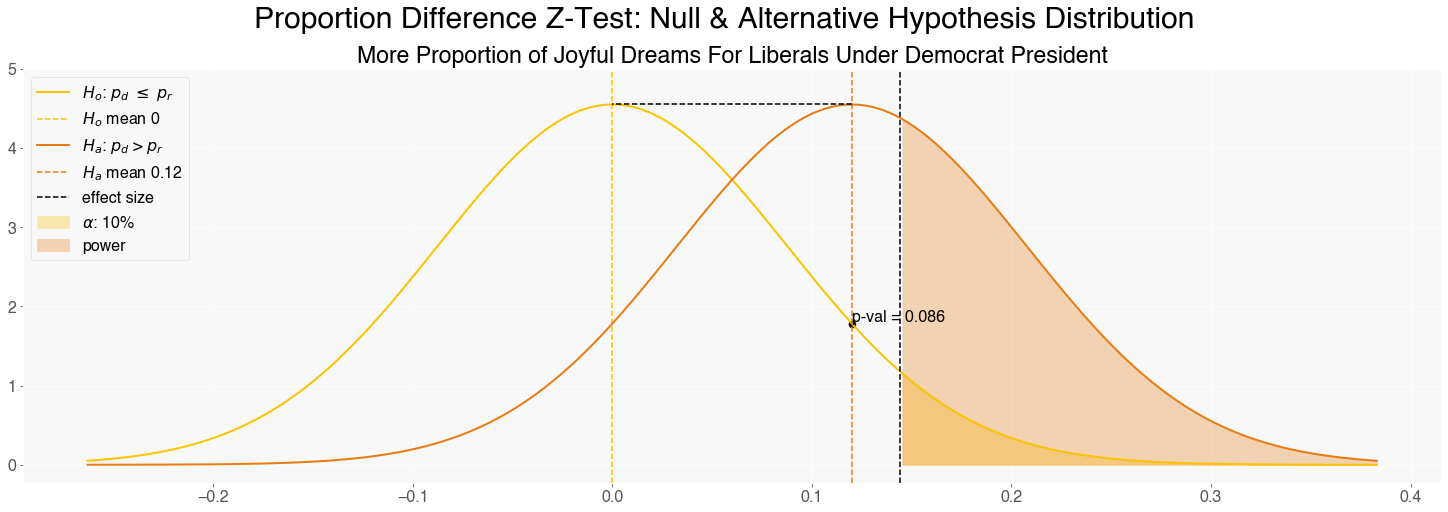

In [2124]:
fig, ax = plt.subplots(figsize=(20,7), constrained_layout=True)

x = np.linspace(0-3*pooled_std, diff_p+3*pooled_std, 300)
null_dist = stats.norm(0,pooled_std)
alt_dist = stats.norm(diff_p,pooled_std)
critical_value = null_dist.ppf(1 - alpha)

ax.plot(x, null_dist.pdf(x), linewidth=2, label='$H_o$: $p_d$ $\leq$ $p_r$', color=bright_colors[-1])
ax.axvline(null_dist.ppf(1-alpha), color='black', ls='--')
ax.fill_between(x, null_dist.pdf(x), where= (x>critical_value), 
                color=bright_colors[-1], alpha=0.3, label=r'$\alpha$: 10%' )
ax.axvline(0, color=bright_colors[-1], ls='--', label='$H_o$ mean 0')





ax.plot(x, alt_dist.pdf(x), linewidth=2, label='$H_a$: $p_d$ > $p_r$', color=deep_colors[-1] )
ax.fill_between(x, alt_dist.pdf(x), where= (x>critical_value), 
                color=deep_colors[-1], alpha=0.3 , label=r'power')
ax.axvline(diff_p, color=deep_colors[-1], ls='--', label=f'$H_a$ mean {diff_p}')


ax.plot([diff_p, 0],[ null_dist.pdf(0)]*2, color='black', ls='--', label='effect size')


ax.scatter(diff_p, null_dist.pdf(diff_p), marker='o', s=50, color='black')
p_val = 1 - stats.norm(0, pooled_std).cdf(abs(diff_p))
ax.text(diff_p, null_dist.pdf(diff_p)+0.02, s=f'p-val = {p_val:.3f}')


ax.set_yticks(np.arange(6))
ax.legend(loc='upper left')

ax.set_title('More Proportion of Joyful Dreams For Liberals Under Democrat President')



fig.suptitle('Proportion Difference Z-Test: Null & Alternative Hypothesis Distribution', fontsize=30)

fig.savefig('../img/joy_dreams_liberals_hypotest.jpg');


    

In [2079]:
p_val = 1 - stats.norm(0, pooled_std).cdf(abs(diff_p))
p_val

0.08559086331153187

In [2083]:
1 - stats.norm(0,1).cdf(diff_p/pooled_std)

0.08559086331153187

### Bonferroni Correction 

In [2084]:
1-(1-0.05)**2

0.09750000000000003

In [2115]:
0.05/2

0.025